# Proyecto final de Machine learning
## Universidad Nacional de Colombia
## Facultad de ingeniaria
## Presentado por Jose Leonardo Sánchez Vásquez 
## Presentado al profesor Fabio Augusto González Osorio



# 1. Entendimiento del negocio    
Teniendo en cuenta la aplicación de nuevas tecnologias en particular lo conocido como inteligencia artifial en varios campos, los bancos actualmente forman equipos de analitica de datos para predicir comportamiento de sus clientes tanto nuevos como antiguos. Por lo tanto, se decide realizar un proyecto de datos de esta indole, basado en un prueba realizada por el banco de Bogotá a los postulantes a trabajo en analitica de datos. Un proyecto similar con basicamente el mismo data set se encontro en la siguiente pagina [Link del proyecto](https://medium.com/analytics-vidhya/term-deposit-opening-decision-f57776b88453)

## 1.1 Objetivos del negocio
El objetivo del negocio aumentar su rentabilidad en cuento a creditos, con este fin se tiene el siguiente objetivo
* Aumentar la tasa de exito al ofrecer creditos a clientes del banco
Se debe tener en cuenta que estos clientes en general son buenos clientes o clientes que potencialmente pagaran su credito, es decir ya tienen un primer filtro y lo que intereza en conocer que tipos de clientes tomaran un credito al realizar el banco campañas para nuevos creditos, es decir predecir si el cliente tomora o no un credito teniendo en cuenta ciertas caracteristicas del cliente y del mercado.

## 1.2 Metas del proyecto de machine learning 
En este proyecto de machine learning se cuenta con un conjunto de datos historico del banco de clientes que han aceptado y que no han aceptado el credito con caracteristicas dadas por el banco, teniendo los datos y el objetivo del negocio se proponen los siguientes objetivos:
* Realizar un analisis exploratorio de los datos para identificar las caracteristicas mas relevantes, ademas, evitar posibles sesgos en modelos debido a correlaciones y desbalanceo de los mismos. 
* Generar un modelo de machine learning que puedad predecir si un cliente nuevo tomara el credito o no
* Evaluar el modelo generado con diferentes metricas acordes al problema presente 






# 2. Entendimiento de los datos 
En esta sección se realizan los procesos de adquisición, analisis exploratorio y descripcion de los datos, asi como, de sus caracteristicas que seran utilizados en este proyecto.  
## 2.1 Recoleccion de los datos 
Los datos utilizados para este proyecto fueron suministrados por un profesional en analitica de datos, que presento una prueba para el puesto de analitica de datos para el banco de Bogotá en dicha prueba conto con tres días para la realización de un modelo que predictivo sobre los clientes del banco para ver si toman o no un credito, los datos son basicamente tomados de la nube quiza esto se debe a que muchos bancos en diferentes paises los utilizan para las pruebas. La siguiente página cuenta con un conjunto de datos y un proyecto similar [Link del proyecto](https://medium.com/analytics-vidhya/term-deposit-opening-decision-f57776b88453), por lo que, parecen ser datos de acceso libre. Por otro lado tambien se encontro el siguinte data set que basicamente parece el mismo [link](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
## 2.2 Descripción de los datos 
En esta seccion se cargan los datos y se revisan las caracteristicas de estos,se deja el siguiente link para descargar los datos [link](https://www.mediafire.com/file/7dp5ka7292i6ibb/train.csv/file)  





In [102]:
# importanto las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn

print("Version de pandas",pd.__version__)
print("Version de numpy",np.__version__)
print('Version de Matplotlib', mpl.__version__)
print('Version de seaborn', sns.__version__)
!python --version



Version de pandas 1.4.3
Version de numpy 1.23.2
Version de Matplotlib 3.5.3
Version de seaborn 0.12.0
Python 3.10.6


In [103]:
# ruta de los datos
ruta=r"D:\Diplomado en machine learning\Machine learning\proyecto final\Prueba_científico_datos\data\interim\train.csv"

In [113]:
# cargando los datos y visualizandolos 
df=pd.read_csv(ruta)
df.head(-20)

ID  Edad           Tipo_Trabajo Estado_Civil  \
0          1    57              servicios       casado   
1          2    37              servicios       casado   
2          3    40  administrador negocio       casado   
3          4    56              servicios       casado   
4          7    25              servicios       single   
...      ...   ...                    ...          ...   
23074  32931    41  administrador negocio       casado   
23075  32936    67            ama de casa     divorced   
23076  32937    41                tecnico       casado   
23077  32942    35                tecnico   divorciado   
23078  32943    33  administrador negocio       casado   

                      Educacion     mora Vivienda Consumo       Contacto  Mes  \
0                  bachillerato  unknown       no      no  telefono fijo  may   
1                  bachillerato       no       si      no  telefono fijo  may   
2                      primaria       no       no      no  telefono fijo  may   
3                  bachillerato       no       no      si  telefono fijo  may   
4                  bachillerato       no       si      no  telefono fijo  may   
...                         ...      ...      ...     ...            ...  ...   
23074                  pregrado       no       si      no        celular  nov   
23075  Estudiante Universitario       no       si      no        celular  nov   
23076  Estudiante Universitario       no       si      no        celular  nov   
23077                preescolar       no       si      no        celular  nov   
23078                  pregrado       no       no      no        celular  nov   

       ... Campana  Dias_Ultima_Camp  No_Contactos  Resultado_Anterior  \
0      ...       1               999             0        sin contacto   
1      ...       1               999             0        sin contacto   
2      ...       1               999             0        sin contacto   
3      ...       1               999             0        sin contacto   
4      ...       1               999             0        sin contacto   
...    ...     ...               ...           ...                 ...   
23074  ...       4               999             0        sin contacto   
23075  ...       2                 5             5       satisfactorio   
23076  ...       2               999             0        sin contacto   
23077  ...       1                 9             4       satisfactorio   
23078  ...       1               999             0        sin contacto   

      emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0              1.1         93994.0          -36.4    4857.00       5191.0  0  
1              1.1         93994.0          -36.4    4857.00       5191.0  0  
2              1.1         93994.0          -36.4    4857.00       5191.0  0  
3              1.1         93994.0          -36.4    4857.00       5191.0  0  
4              1.1         93994.0          -36.4    4857.00       5191.0  0  
...            ...             ...            ...        ...          ... ..  
23074         -1.1         94767.0          -50.8       1.04       4963.6  1  
23075         -1.1         94767.0          -50.8    1039.00       4963.6  1  
23076         -1.1         94767.0          -50.8    1039.00       4963.6  0  
23077         -1.1         94767.0          -50.8    1035.00       4963.6  1  
23078         -1.1         94767.0          -50.8    1035.00       4963.6  1  

[23079 rows x 21 columns]

In [107]:
# onservando sus columnas y tipos de datos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23099 entries, 0 to 23098
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  23099 non-null  int64  
 1   Edad                23099 non-null  int64  
 2   Tipo_Trabajo        23099 non-null  object 
 3   Estado_Civil        23099 non-null  object 
 4   Educacion           23099 non-null  object 
 5   mora                23099 non-null  object 
 6   Vivienda            23099 non-null  object 
 7   Consumo             23099 non-null  object 
 8   Contacto            23099 non-null  object 
 9   Mes                 23099 non-null  object 
 10  Dia                 23099 non-null  object 
 11  Campana             23099 non-null  int64  
 12  Dias_Ultima_Camp    23099 non-null  int64  
 13  No_Contactos        23099 non-null  int64  
 14  Resultado_Anterior  23099 non-null  object 
 15  emp_var_rate        23099 non-null  float64
 16  cons

Colocando por defecto las tablas a la izquierda 

In [108]:
%%html
<style>
table {float:left}
</style>

Descripción de los datos, el data set contiene las siguientes columnas de caracteristicas 

 | Nombre | descripción | Tipo de atributo |Tipo de dato  |rango de valores o numero de categorias|
 | :--- | :--- | :--- | :--- | :--- |
 |ID|codigo de identificacion unico|asignado al sujeto|numerico int64|rango [1,23099]|
 |Edad| Edad del cliente|propio del sujeto|numerico int64| rango [18,95]|
 |Tipo_trabajo|Trabajo del cliente|propio del sujeto| categorico object| string 12 categorias |
 |Estado_Civil|Estado civil del cliente| propio del sujeto| categorico  object| string 6 categorias |
 |Educacion| nivel de educacion del cliente| propio del sujeto|categorico object| string 8 categorias |
 |mora|a presentado mora el cliente en un prestamo|asignado al sujeto|categorico object| string 3 categorias |
 |Vivienda|Tiene prestamo de vivienda el cliente|estado del sujeto|categorico object| string 3 categorias |
 |Consumo|Tiene prestamo de Consumo el cliente|estado del sujeto|categorico object| string 3 categorias |
 |
 |Contacto|Tipo de telefono de contacto del cliente|caracteristica del sujeto|categorico object| string 2 categorias |
 |
 |Mes|Mes de ultimo contacto con el cliente|campaña de marketing|categorico object| string 10 categorias |
 |
 |Dia|día del ultimo contacto con el cliente|campaña de marketing|categorico object| string 5 categorias |
 |
 |Campana|numero de contactos realizados con el cliente durante la actual campaña|campaña de marketing |numerico int 64| rango [1,39] |
 |
 | Dias_Ultima_Camp| numero de dias que ha pasado desde la ultima campaña sin contactar al cliente, si nunca a sido contactado 999|caracteristica de contacto del cliente|numerico int 64| rango [1,999]|
 | No_Contactos| numero de veces que ha sido contactado el cliente antes de esta campaña|caracteristica de contacto del cliente|numerico int 64| rango [0,7]|
 | Resultado_Anterior| resultado de la campaña de marketing sobre el cliente| propio de la campaña sobre el cliente|categorico object| string 3 categorias |
 | emp_var_rate| tasa de variacion de empleo, indicador trimestral|social economico |numerico float 64| rango [-3.40,1.4]|
 | cons_price_idx|indice de precios al consumidor, mide la variacion de la canasta familiar mes a mes |social economico |numerico float 64| rango [93.20,94767]|
 | cons_conf_idx|indice de confianza del consumidor, mide la confianza de consumidor sobre la ecomia nacional y personal  |social economico |numerico float 64| rango [-50.8,-26.9]|
 | euribor3m| tasa de prestamos a tres meses entre bancos europeos|social economico |numerico float 64| rango [0.634,5045]|
 |nr_employed	|numero de empleados |desconocido|numerico float 64| rango [7963,5228]|
 |y	|variable objetivo accede al credito o no, binaria |bancaria |numerico int 64| rango [0,1]|

## 2.2 Exploracion de los datos 
En esta seccion se realiza todo el analisis exploratorio de los datos, utilizando las funcion de pandas, numpy y graficas en matplotlib

In [109]:
# estadisticas basicas 
df.describe()

ID          Edad       Campana  Dias_Ultima_Camp  \
count  23099.000000  23099.000000  23099.000000      23099.000000   
mean   16420.136499     40.067665      2.560154        962.976060   
std     9521.074915     10.449983      2.756954        185.675409   
min        1.000000     18.000000      1.000000          0.000000   
25%     8158.000000     32.000000      1.000000        999.000000   
50%    16375.000000     38.000000      2.000000        999.000000   
75%    24644.500000     47.000000      3.000000        999.000000   
max    32967.000000     95.000000     42.000000        999.000000   

       No_Contactos  emp_var_rate  cons_price_idx  cons_conf_idx  \
count  23099.000000  23099.000000    23099.000000   23099.000000   
mean       0.171003      0.095649    85576.471847     -40.485237   
std        0.494079      1.565650    26224.436234       4.629643   
min        0.000000     -3.400000       93.200000     -50.800000   
25%        0.000000     -1.800000    92893.000000     -42.700000   
50%        0.000000      1.100000    93876.000000     -41.800000   
75%        0.000000      1.400000    93994.000000     -36.400000   
max        6.000000      1.400000    94767.000000     -26.900000   

          euribor3m   nr_employed             y  
count  23099.000000  23099.000000  23099.000000  
mean    3190.939789   5167.329439      0.112126  
std     2088.703058     72.260805      0.315528  
min        0.634000   4963.600000      0.000000  
25%     1281.000000   5099.100000      0.000000  
50%     4856.000000   5191.000000      0.000000  
75%     4961.000000   5228.100000      0.000000  
max     5045.000000   5228.100000      1.000000

In [114]:
# otra manera de visulizar los datos y sus categotias unicas es  
columnas=df.columns
for i in columnas:
    print(f"columna {i} \n",df[i].unique())
    print(f"cantidad de categorias {i} \n",len(df[i].unique()))
    print("\n")

columna ID 
 [    1     2     3 ... 32965 32966 32967]
cantidad de categorias ID 
 23099


columna Edad 
 [57 37 40 56 25 41 29 35 46 50 55 39 59 49 34 52 32 38 42 45 54 47 51 48
 44 33 60 53 43 58 36 24 30 28 27 31 22 26 20 23 21 61 18 70 73 88 95 19
 77 68 75 63 66 80 62 65 72 82 64 67 71 69 78 85 79 83 81 74 76 91 86 84
 92 89]
cantidad de categorias Edad 
 74


columna Tipo_Trabajo 
 ['servicios' 'administrador negocio' 'empleado' 'pensionado' 'tecnico'
 'vendedor ambulante' 'emprendedor' 'ama de casa' 'Vive de los arriendos'
 'desempleado' 'unknown' 'estudiante']
cantidad de categorias Tipo_Trabajo 
 12


columna Estado_Civil 
 ['casado' 'single' 'soltero' 'divorced' 'divorciado' 'unknown']
cantidad de categorias Estado_Civil 
 6


columna Educacion 
 ['bachillerato' 'primaria' 'unknown' 'bachillerato incompleto' 'pregrado'
 'preescolar' 'Estudiante Universitario' 'Ninguno']
cantidad de categorias Educacion 
 8


columna mora 
 ['unknown' 'no' 'si']
cantidad de categorias mora 
 3

### 2.2.1 Gráficos de histogramas, barras y cajas  
variables numericas 


In [111]:
# estilos de matplotlib
print( plt.style.available)
plt.style.use('seaborn-darkgrid')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [9]:
#columnas numericas 
numeric=df._get_numeric_data().columns
print(numeric)
print(f"numero de columnas numericas { len(numeric[1:])}")
#titulos del eje equis de cada figura
ejex_fig=["Edades de los clientes","Numero de contactos realizados en la campaña",
          "Numero dias sin contactar al cliente","cantidad de veces que ha sido contactado",
         
         "tasa de variacion de empleo", "indice de precios al consumidor puntos",
          "indice de confianza del consumidor", "taza de credito a 3 meses entre bancos",
          "numero de empleados","variable objetivo" ]

Index(['ID', 'Edad', 'Campana', 'Dias_Ultima_Camp', 'No_Contactos',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'y'],
      dtype='object')
numero de columnas numericas 10


Gráficas de las columnas numericas, sin tener en cuenta la etiqueta  

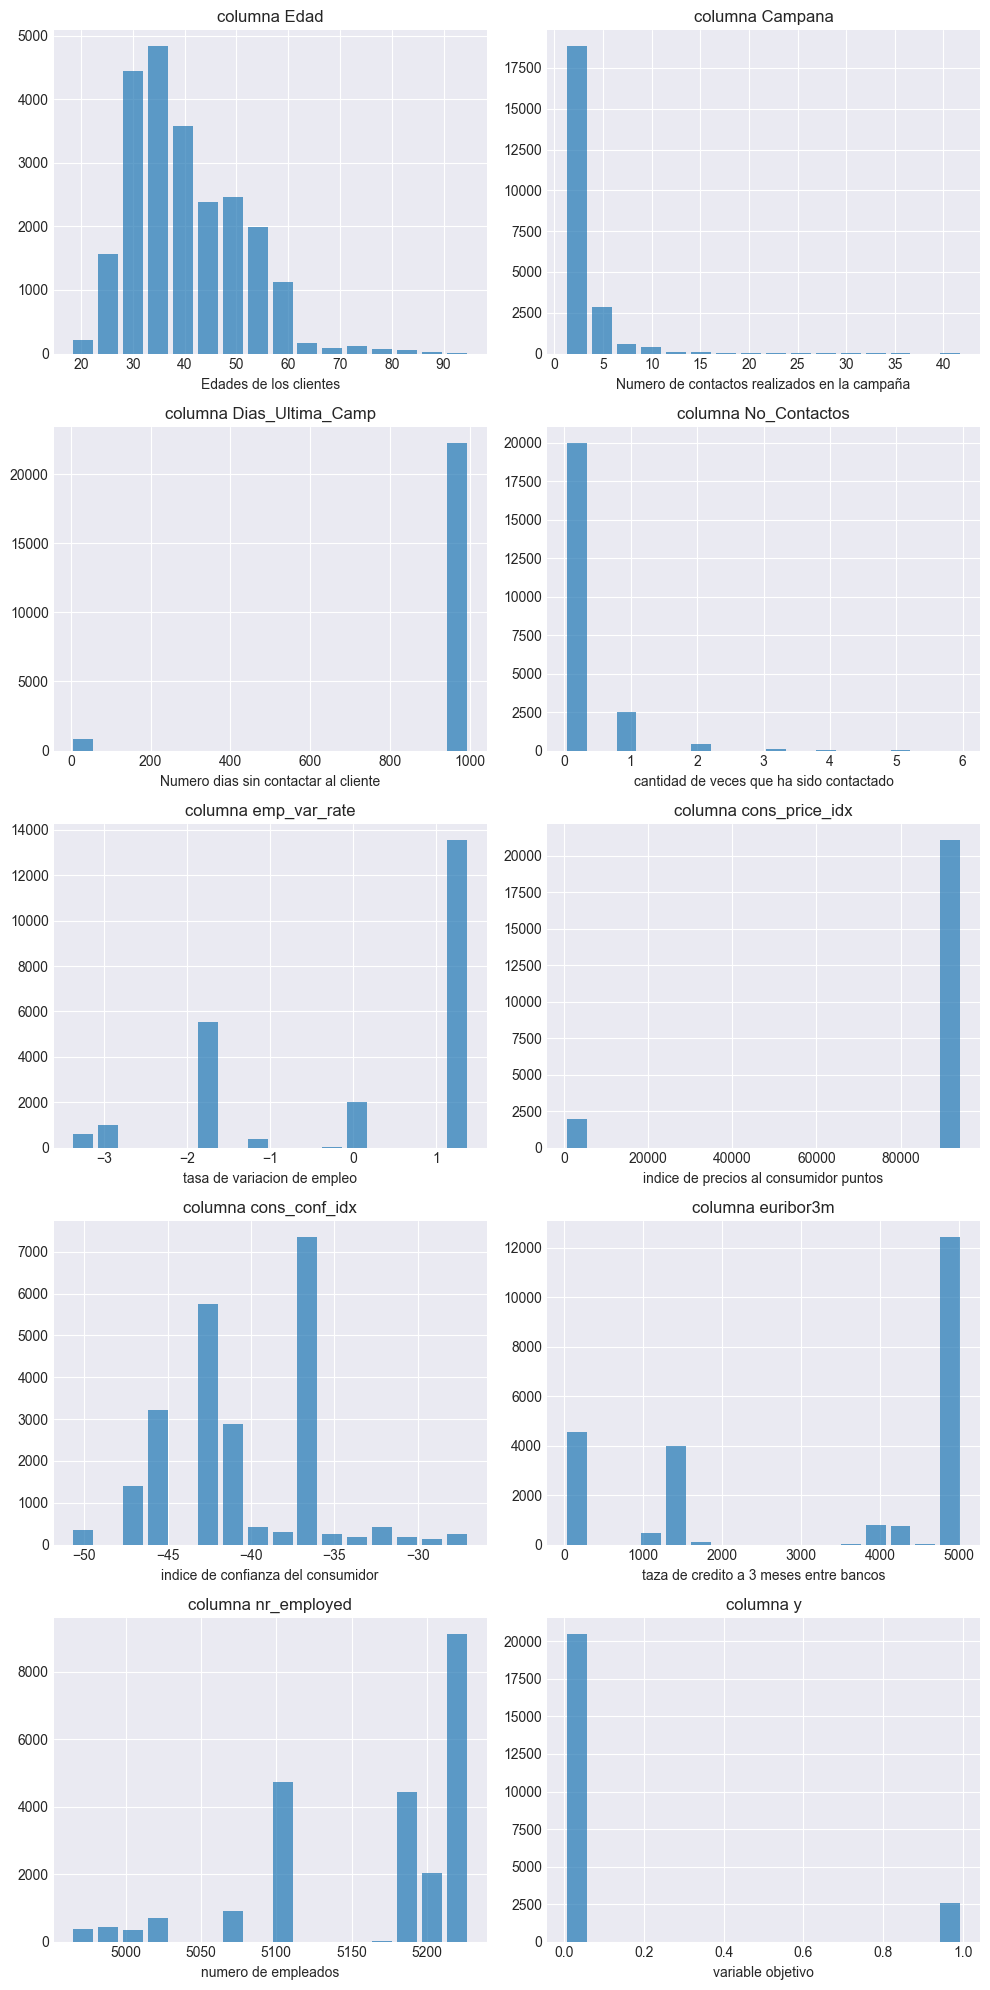

In [115]:
fig, ax=plt.subplots(5,2,figsize=(10,20))
ax=ax.ravel()    
for i in range(1,11):
    ax[i-1].set_title(f"columna {numeric[i]}")
    ax[i-1].set_xlabel(ejex_fig[i-1])
    ax[i-1].hist(df[numeric[i]],bins=16,alpha=0.7,rwidth=0.8)
    
fig.tight_layout()        
       

Gráficas de las columnas numericas usando seaborn teniedno en cuenta la etiqueta 

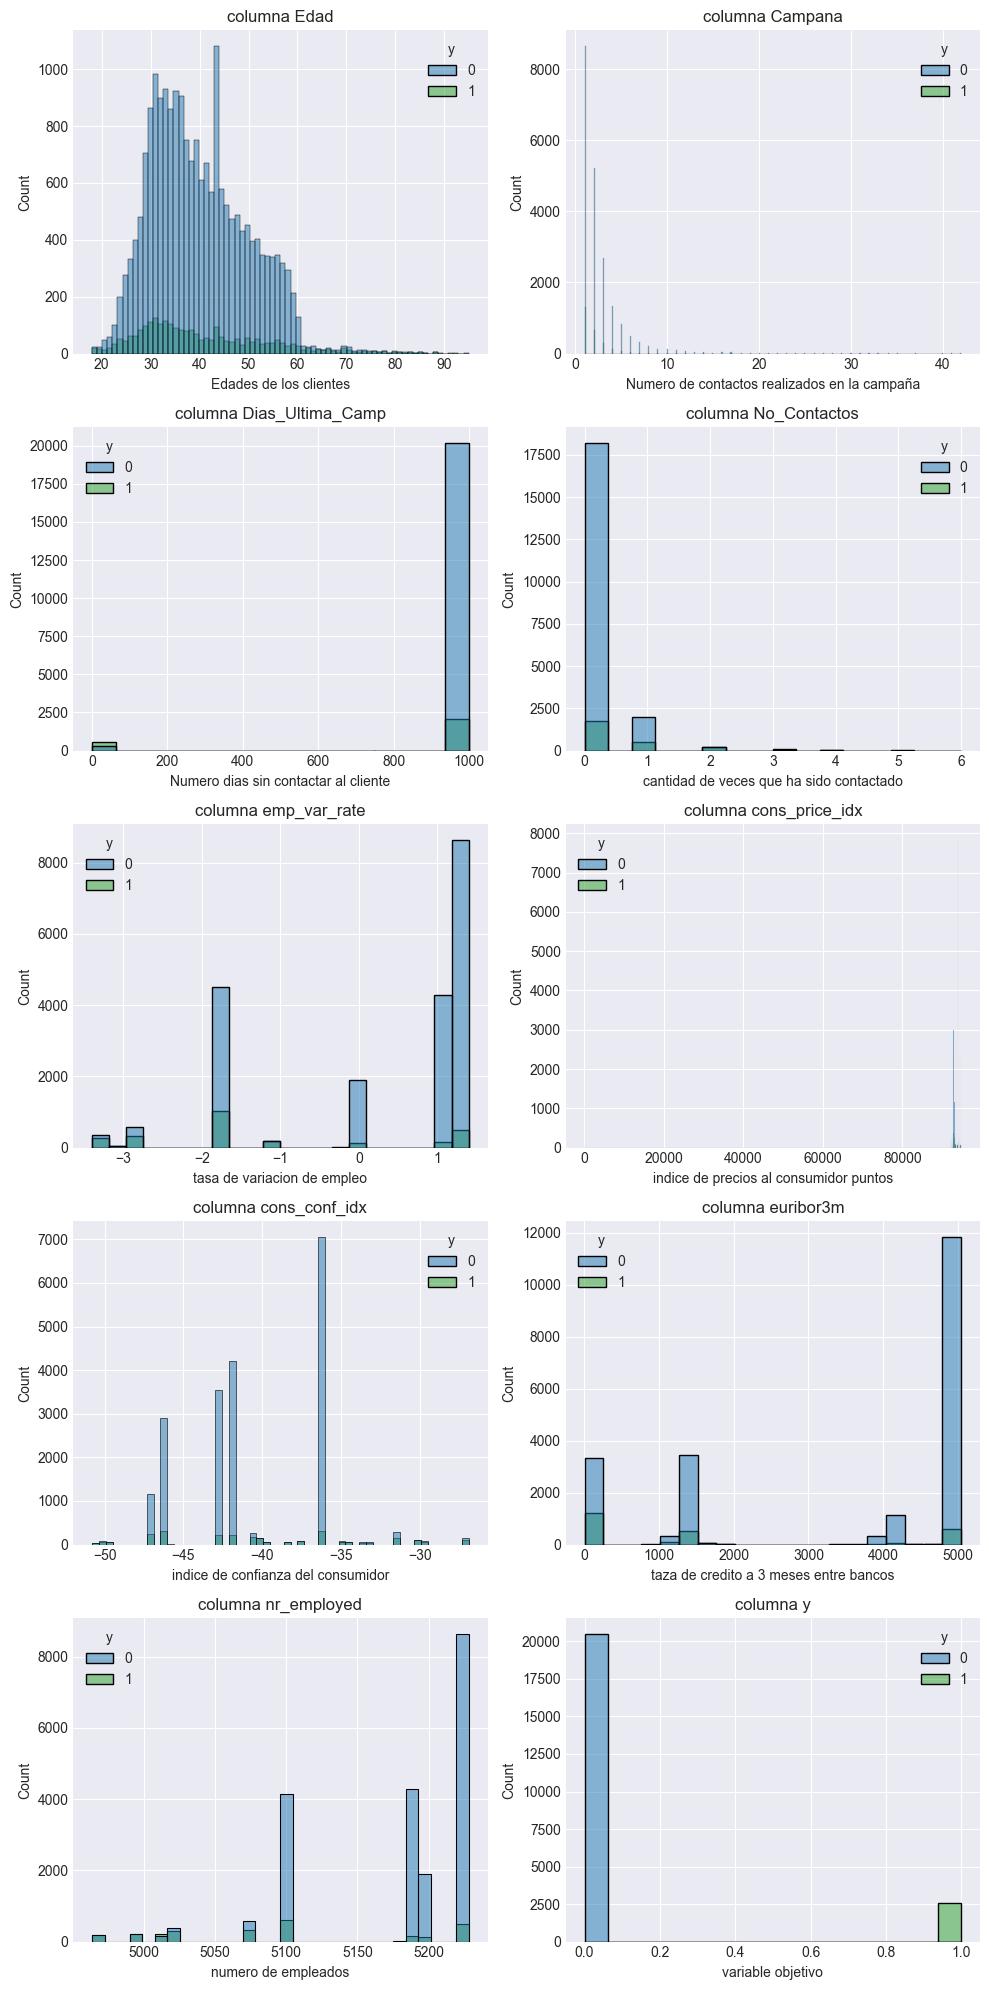

In [11]:
fig, ax=plt.subplots(5,2,figsize=(10,20))
ax=ax.ravel()    
for i in range(1,11):
    ax[i-1].set_title(f"columna {numeric[i]}")
    ax[i-1].set_xlabel(ejex_fig[i-1])
    sns.histplot(data=df,x=numeric[i],ax=ax[i-1],hue="y",palette=["C0", "C2"])
    
fig.tight_layout()   

Graficos de cajas de las columnas numericas 

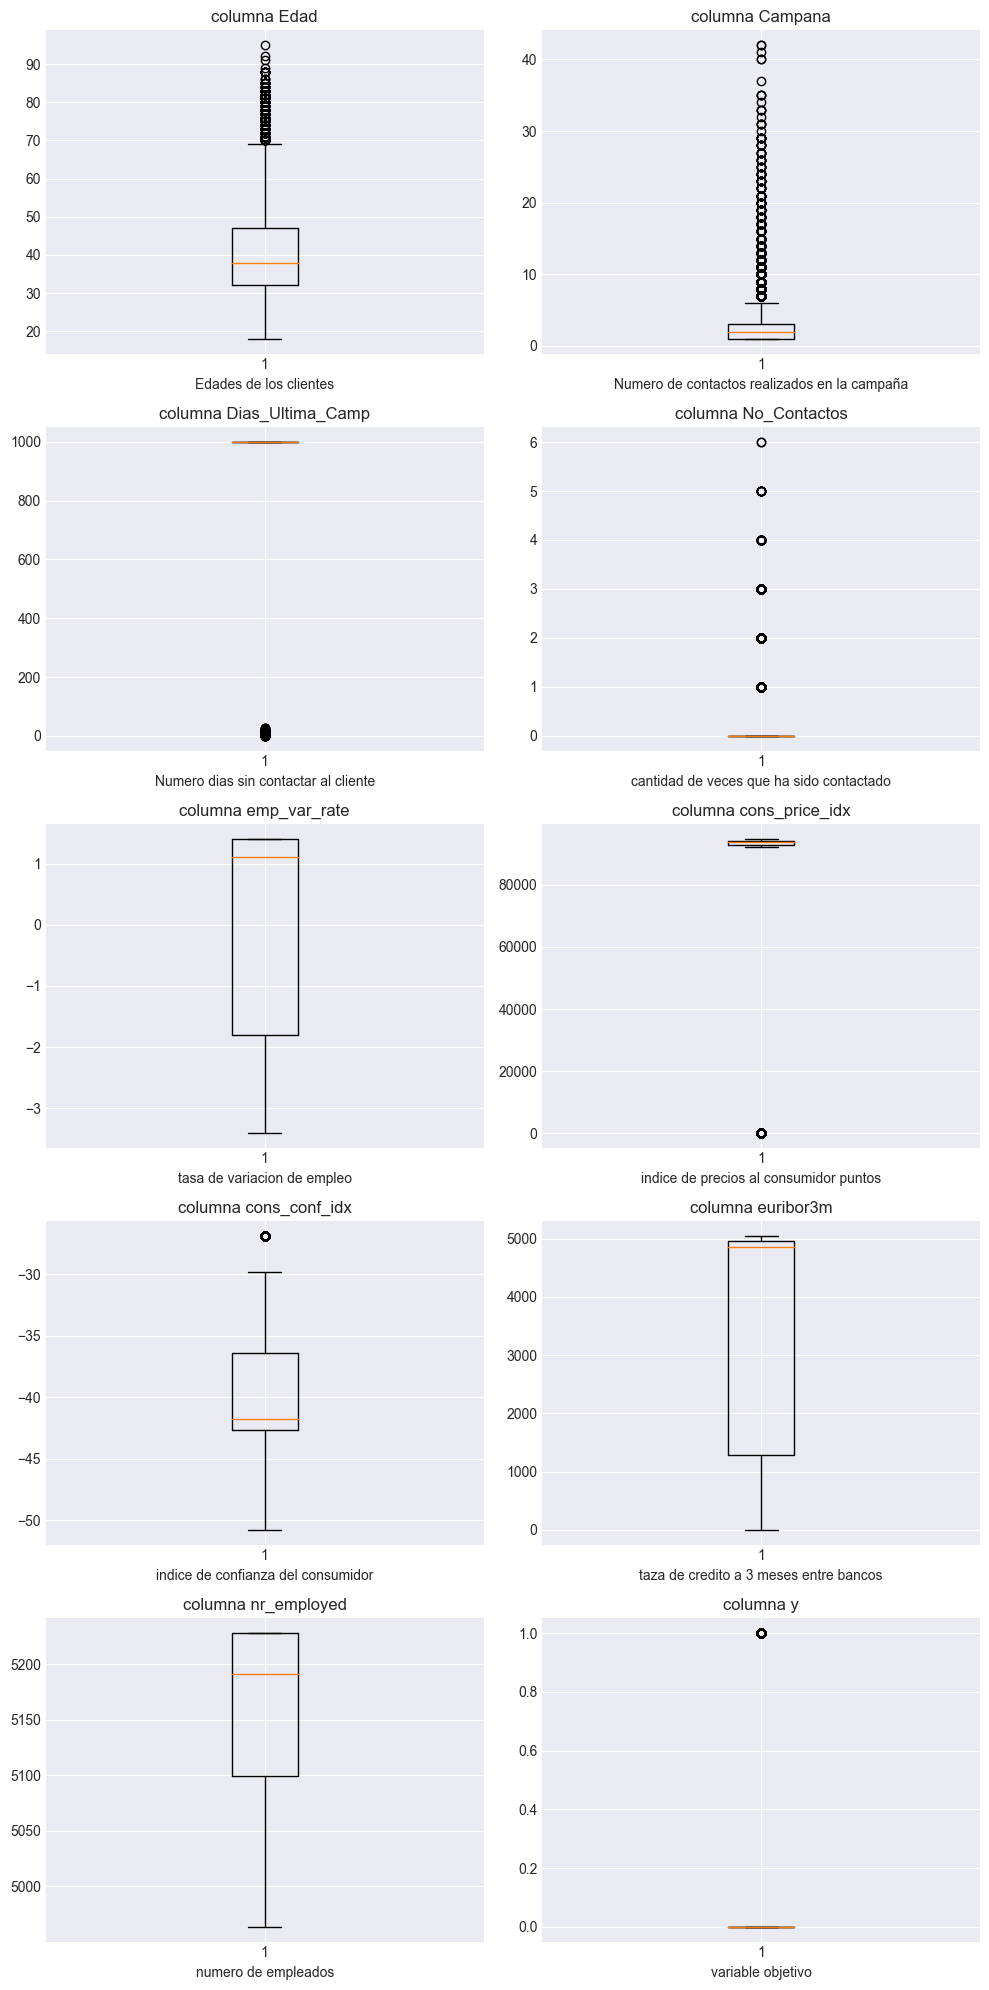

In [12]:
fig, ax=plt.subplots(5,2,figsize=(10,20))
ax=ax.ravel()    
for i in range(1,11):
    ax[i-1].set_title(f"columna {numeric[i]}")
    ax[i-1].set_xlabel(ejex_fig[i-1])
    ax[i-1].boxplot(df[numeric[i]])
    
fig.tight_layout()    

Ahora diagrama de cajas en seaborn

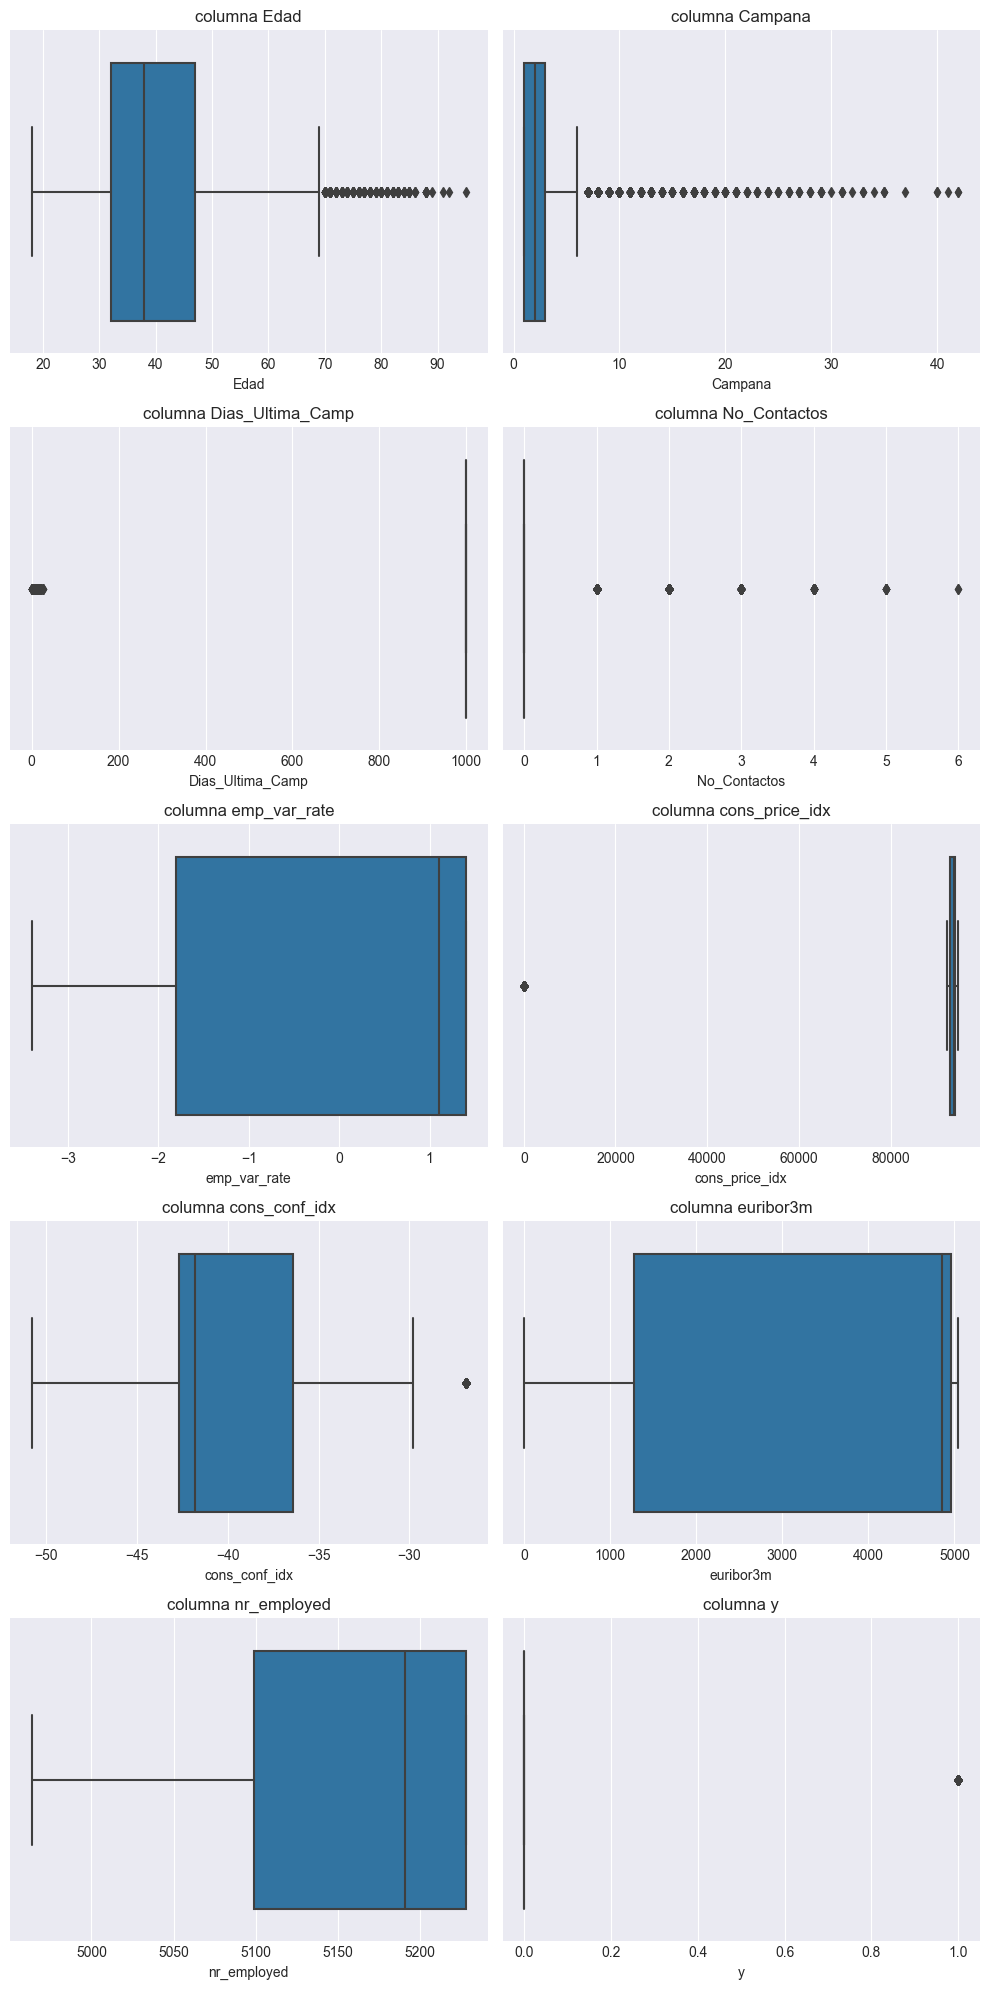

In [13]:
fig, ax=plt.subplots(5,2,figsize=(10,20))
ax=ax.ravel()    
for i in range(1,11):
    ax[i-1].set_title(f"columna {numeric[i]}")
    ax[i-1].set_xlabel(ejex_fig[i-1])
    sns.boxplot(data=df,x=numeric[i],ax=ax[i-1])
    
fig.tight_layout()   

Como se observa en algunos graficos tanto de cajas como de histogramas se ven algunos valores anomalos o outliers, volveremos a los mismo mas adelante por ahora grafiquemos las variables categoricas 

In [14]:
categoricas=df.select_dtypes('object').columns
print(categoricas)
print(f"numero de variables categoricas {len(categoricas)}")
ejex_fig_catg=["Tipo de trabajo","Estado civil","Educación",
               "Mora es prestamos","Tiene credito de vivienda","Tiene credito de consumo",
              "Tipo de telefono de contacto","ultimo mes de contacto","ultimo día de contacto"
              ,"resultado del contacto con el cliente"]



Index(['Tipo_Trabajo', 'Estado_Civil', 'Educacion', 'mora', 'Vivienda',
       'Consumo', 'Contacto', 'Mes', 'Dia', 'Resultado_Anterior'],
      dtype='object')
numero de variables categoricas 10


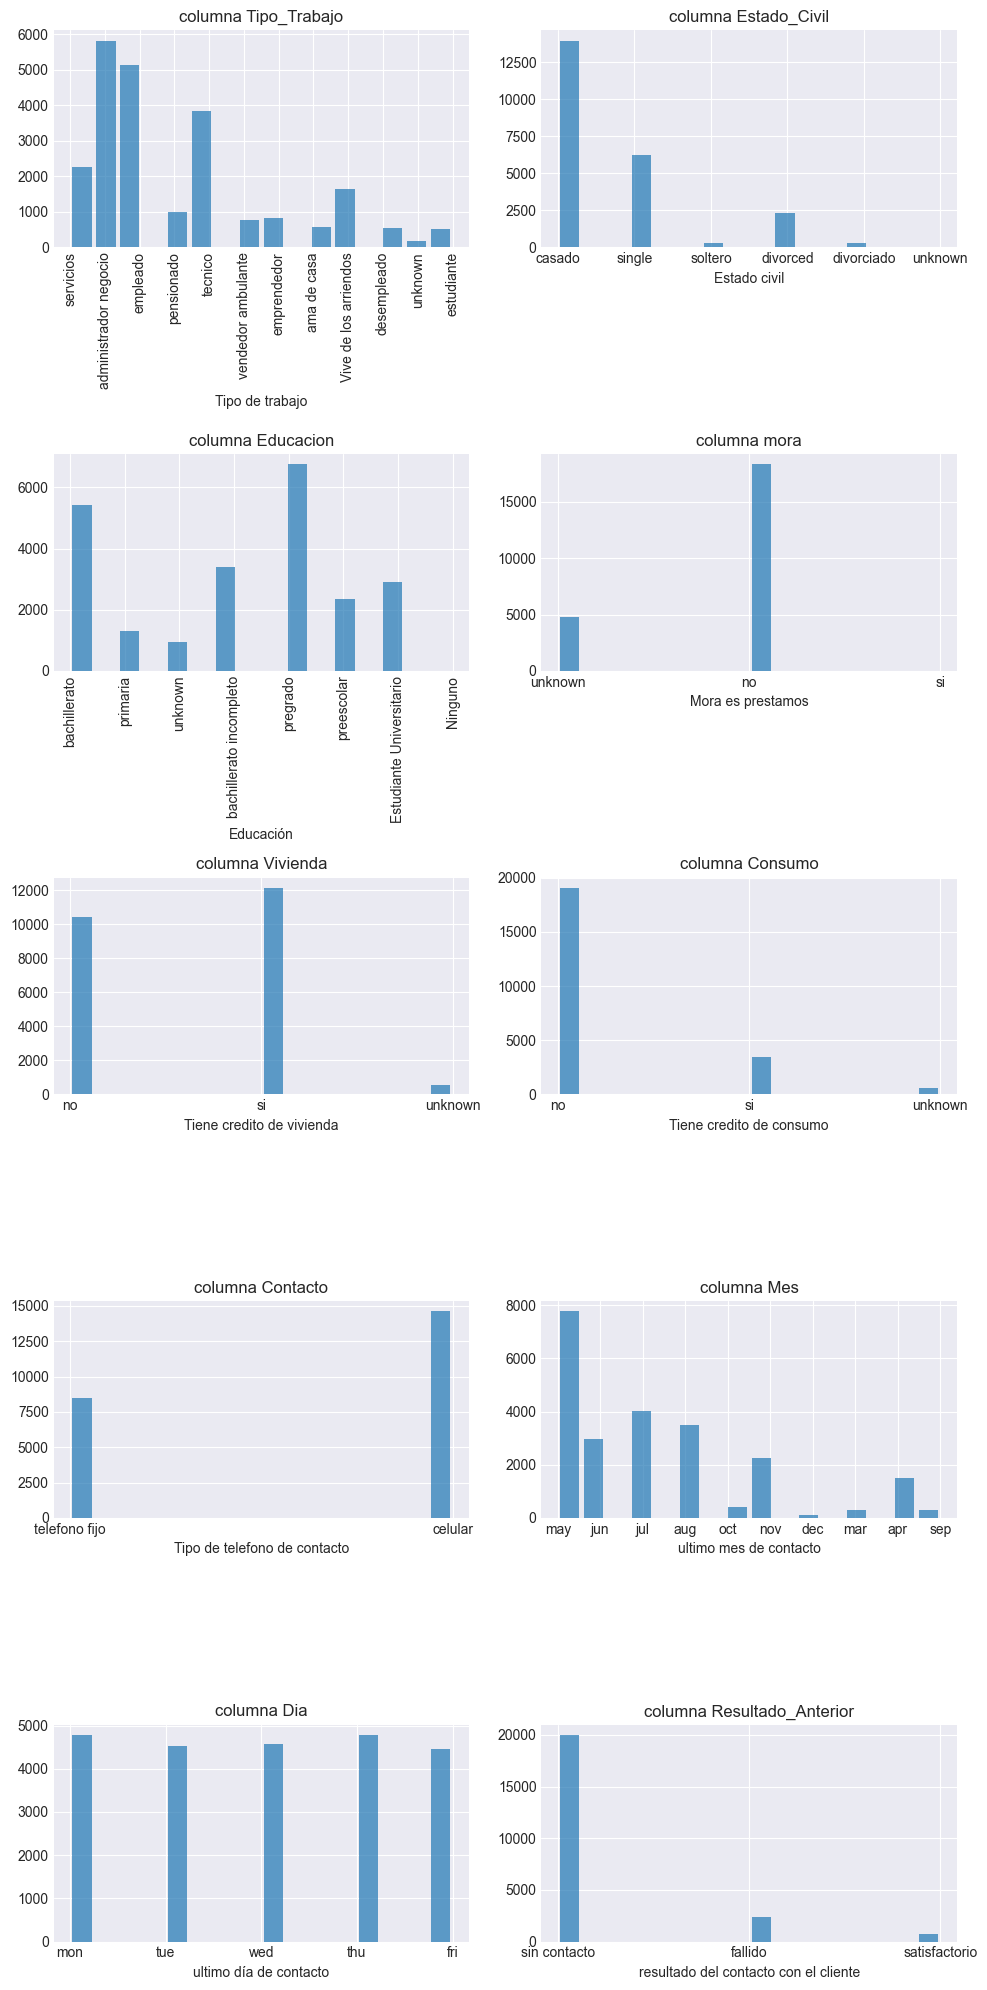

In [15]:
fig, ax=plt.subplots(5,2,figsize=(10,20))
ax=ax.ravel()    
for i in range(10):
    ax[i].set_title(f"columna {categoricas[i]}")
    ax[i].set_xlabel(ejex_fig_catg[i])
    if(i==0 or i==2):
        ax[i].tick_params(axis='x', rotation=90)
    ax[i].hist(df[categoricas[i]],bins=16,alpha=0.7,rwidth=0.8)
    
fig.tight_layout()      

Ahora grafiquemos con seaborn teniendo en cuenta la clase objetivo 

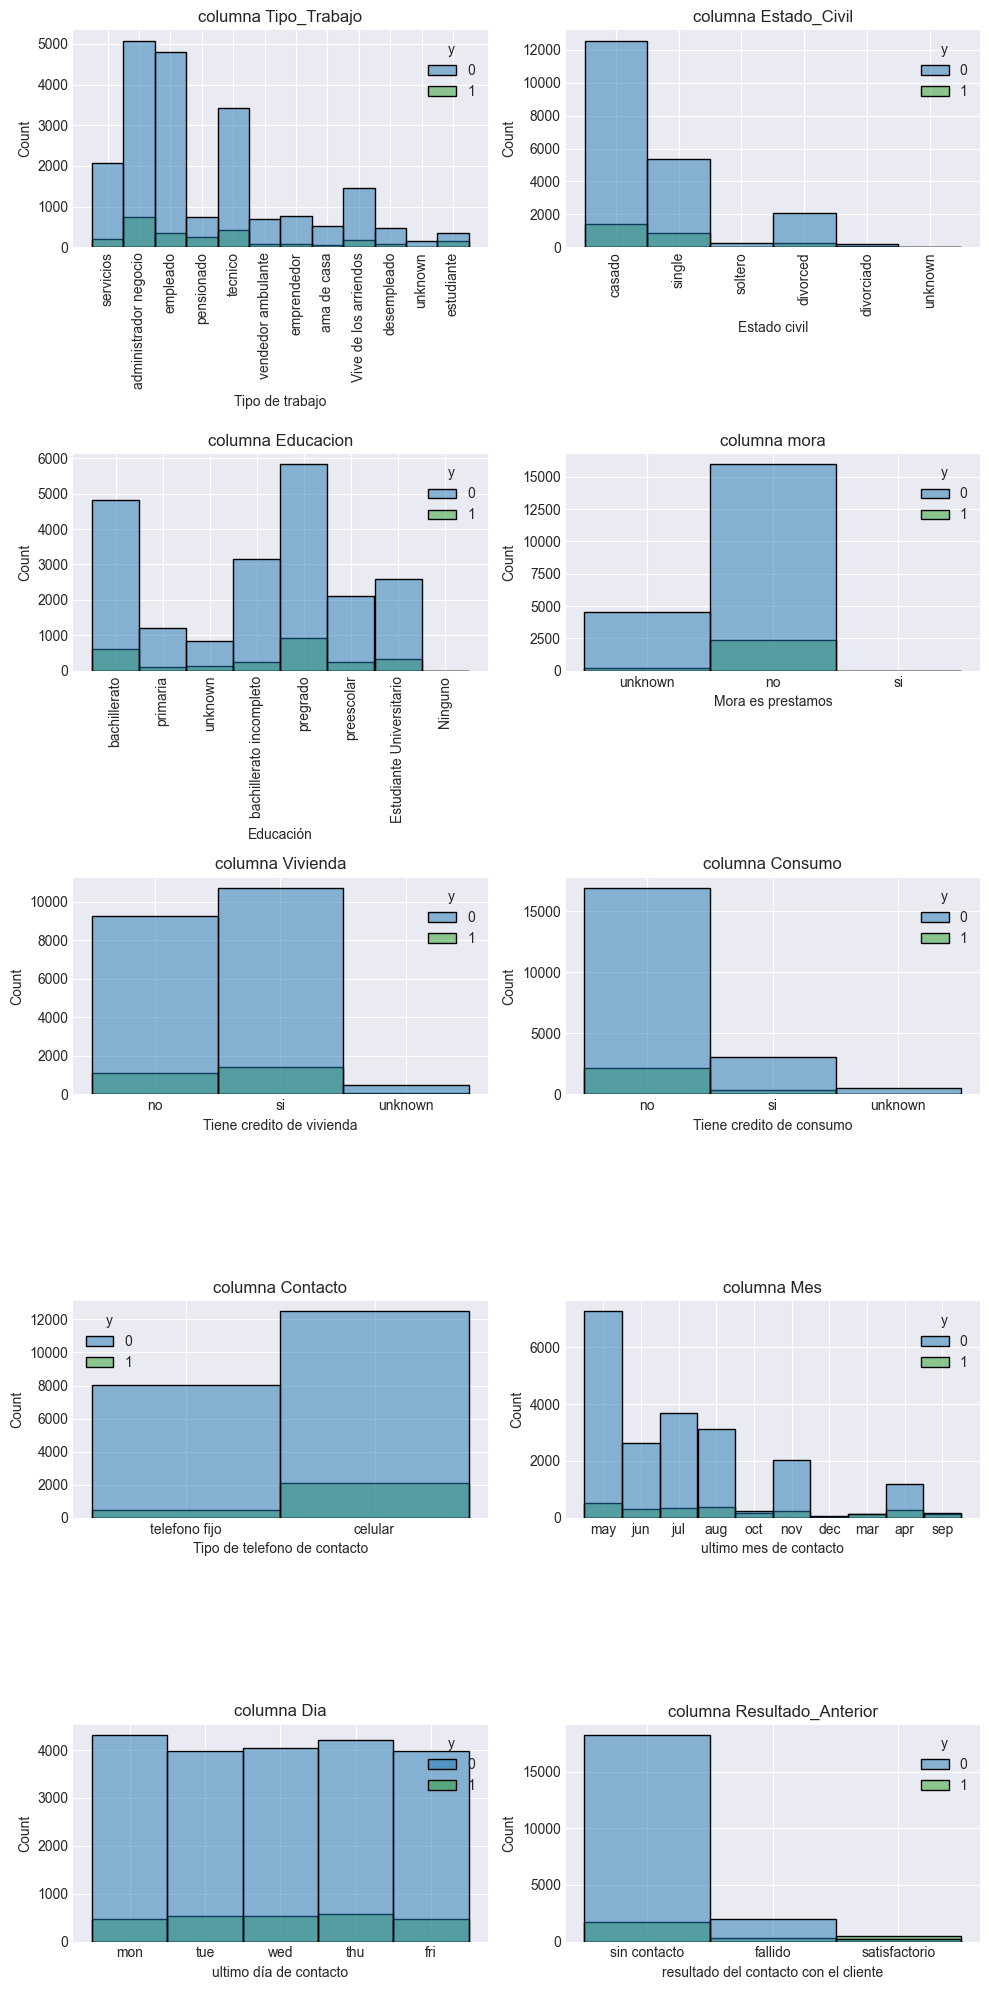

In [16]:
fig, ax=plt.subplots(5,2,figsize=(10,20))
ax=ax.ravel()    
for i in range(0,10):
    ax[i].set_title(f"columna {categoricas[i]}")
    ax[i].set_xlabel(ejex_fig_catg[i])
    if(i==0 or i==2 or i==1):
        ax[i].tick_params(axis='x', rotation=90)
    sns.histplot(data=df,x=categoricas[i],ax=ax[i],hue="y",palette=["C0", "C2"])
    
fig.tight_layout()  

## 2.3 Verificacion de la calidad de los datos 
Es esta subseccion se observara si los datos tienen valores anomalos que deben ser eleminados o correguidos. 
### 2.3.1 variables numericas 
Revicemos las variables numericas 


In [17]:
df_numeric= df[numeric]
display(df_numeric.head())
df_numeric.describe()

ID  Edad  Campana  Dias_Ultima_Camp  No_Contactos  emp_var_rate  \
0   1    57        1               999             0           1.1   
1   2    37        1               999             0           1.1   
2   3    40        1               999             0           1.1   
3   4    56        1               999             0           1.1   
4   7    25        1               999             0           1.1   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0         93994.0          -36.4     4857.0       5191.0  0  
1         93994.0          -36.4     4857.0       5191.0  0  
2         93994.0          -36.4     4857.0       5191.0  0  
3         93994.0          -36.4     4857.0       5191.0  0  
4         93994.0          -36.4     4857.0       5191.0  0

ID          Edad       Campana  Dias_Ultima_Camp  \
count  23099.000000  23099.000000  23099.000000      23099.000000   
mean   16420.136499     40.067665      2.560154        962.976060   
std     9521.074915     10.449983      2.756954        185.675409   
min        1.000000     18.000000      1.000000          0.000000   
25%     8158.000000     32.000000      1.000000        999.000000   
50%    16375.000000     38.000000      2.000000        999.000000   
75%    24644.500000     47.000000      3.000000        999.000000   
max    32967.000000     95.000000     42.000000        999.000000   

       No_Contactos  emp_var_rate  cons_price_idx  cons_conf_idx  \
count  23099.000000  23099.000000    23099.000000   23099.000000   
mean       0.171003      0.095649    85576.471847     -40.485237   
std        0.494079      1.565650    26224.436234       4.629643   
min        0.000000     -3.400000       93.200000     -50.800000   
25%        0.000000     -1.800000    92893.000000     -42.700000   
50%        0.000000      1.100000    93876.000000     -41.800000   
75%        0.000000      1.400000    93994.000000     -36.400000   
max        6.000000      1.400000    94767.000000     -26.900000   

          euribor3m   nr_employed             y  
count  23099.000000  23099.000000  23099.000000  
mean    3190.939789   5167.329439      0.112126  
std     2088.703058     72.260805      0.315528  
min        0.634000   4963.600000      0.000000  
25%     1281.000000   5099.100000      0.000000  
50%     4856.000000   5191.000000      0.000000  
75%     4961.000000   5228.100000      0.000000  
max     5045.000000   5228.100000      1.000000

De los gráficos realizados en la seccion anterior y de los valores mostrados, se analizara cada columna por separado

+ **Edad**: sus valores no presentan ninguna anomalia, rango(18,95)
+ **Campana**: sus valores no presentan anomalias, rango (1,42)
+ **Dias_Ultima_Camp**: De las graficas y de su rango se observa que el valor 999 que significa que nunca ha sido contacxtado el cliente se comporta como un outliers, por lo que, se debe reasignar su valor 
+ **No_Contactos**:  sus valores no presentan anomias, rango(0,6)
+ **emp_var_rate**: sus valores no presentan anomalias, rango(-3.4,1.4)
+ **cons_price_idx**: sus valores presentan anomalias, ya que el valor debe oscilar entre 80 y 120,
teniendo este valores mayores, es un vaor de puntos esto se puede observar del historico [link](https://es.tradingeconomics.com/portugal/consumer-price-index-cpi) de portugal, lo que significa que hubo un error al entrar los datos
+ **euribor3m**: sus valores presentan indices de interes hasta de 5000%, por tanto, deben corregirce y su rango no debe ser mayor a 10%, debe ser un error de entrada de datos
+ **nr_employed**:  aunque esta variabe no es muy clara, no prsenta anomalias comparandola con los datos del siguinte proyecto [link](https://medium.com/analytics-vidhya/term-deposit-opening-decision-f57776b88453) 
+ **y**: la variable objetivo no presenta outliers, sin embargo, presenta desbalance


### 2.3.1 variables categoricas 
Revicemos las variables categoricas 

In [18]:
df_categoric= df[categoricas]
display(df_categoric.head())


Tipo_Trabajo Estado_Civil     Educacion     mora Vivienda Consumo  \
0              servicios       casado  bachillerato  unknown       no      no   
1              servicios       casado  bachillerato       no       si      no   
2  administrador negocio       casado      primaria       no       no      no   
3              servicios       casado  bachillerato       no       no      si   
4              servicios       single  bachillerato       no       si      no   

        Contacto  Mes  Dia Resultado_Anterior  
0  telefono fijo  may  mon       sin contacto  
1  telefono fijo  may  mon       sin contacto  
2  telefono fijo  may  mon       sin contacto  
3  telefono fijo  may  mon       sin contacto  
4  telefono fijo  may  mon       sin contacto

De los graficos anterioes se observa que en general no presentan ninguna categoria, ilogica o erronea, solo para el estado civil se tiene:
+ **Estado_Civil**: contiene single y soltero que significan lo mismo, por tanto, se debe unificar dicha categoria 



# 3. Preparacion de los datos 
En esta seccion se preparan los datos mediante procesos de limpieza, imputacion y recodificacion de los mismos para su posterior utilizacion en modelos de clasificación
## 3.1 Limpieza de los datos
En esta subsección se recalculan algunos valores debido en general a errores de digitacion en las columnas numericas y se unifican categorias duplicadas. Así, como  tambien nueva categorias o imputación de los datos   


Columna **Dias_Ultima_Camp**: columna se le asignaran solo dos tipos de valores, el cliente a sido contactado 1 y el cliente no a sido contactado 0

In [159]:
df_prep=df.copy(deep=True) #datos preparados primero copiamos los datos 
df_prep["Dias_Ultima_Camp"]=df_prep["Dias_Ultima_Camp"].apply(lambda x: 1 if x==999 else 0)
df_prep["Dias_Ultima_Camp"].unique() # nuevas categotias

array([1, 0], dtype=int64)

Como se observa solo quedaron dos valores 0 si no ha sido contactado y 1 de los contrario.  
Columna **cons_price_idx** es esta se deb tener en cuenta que los valores no tienen el mismo orden de magnitud este debe ser 10^2

In [160]:
#fun es las funcion para trasnformar los nmeros en el orden de magnitud correcto
fun=lambda x: x if len(str(int(x)))<3 else x/(10**(len(str(int(x)))-2))
df_prep["cons_price_idx"]=df_prep["cons_price_idx"].apply(fun)
minimo=df_prep["cons_price_idx"].min()
maximo=df_prep["cons_price_idx"].max()
print(f"valor minimo {minimo}")
print(f"valor maximo {maximo}")

valor minimo 92.201
valor maximo 94.767


En la salida anterior se muestra que la transformación fue un exito, ya que se encuentra en el rango esperado

Columna **euribor3m** de las mimas forma que la columna anterior tiene errores de digitacion, ya que este valor no debe superar el 10, debido a que es una taza de interes 

In [161]:
fun2=lambda x: x if x<10 else x/1000
df_prep["euribor3m"]=df_prep["euribor3m"].apply(fun2)
minimo=df_prep["euribor3m"].min()
maximo=df_prep["euribor3m"].max()
print(f"valor minimo {minimo}")
print(f"valor maximo {maximo}")

valor minimo 0.634
valor minimo 5.045


Como se observa ahora los valores se encuentran entre el rango real en la variable **euribor3m**.  
Por ultimo, falta correguir la columna **Estado_Civil** cambiando la categoria single por soltero y de las misma forma para divorced y divorciado  

In [162]:
fun3=lambda x: x if x!="single" else "soltero"
df_prep["Estado_Civil"]=df_prep["Estado_Civil"].apply(fun3)
fun4=lambda x: x if x!="divorced" else "divorciado"
df_prep["Estado_Civil"]=df_prep["Estado_Civil"].apply(fun4)
df_prep["Estado_Civil"].unique()

array(['casado', 'soltero', 'divorciado', 'unknown'], dtype=object)

Las categorias ahora son las correctas.

## 3.2 selecion de caracteristicas 
En esta subseccion determinaremos que caracterirticas de los datos se seleccionaran para el modelo, con este fin realizaremos un mapa de calor de las caracreristicas numericas para ver si hay una correlación entre las mismas.  

In [163]:
correlaciones=df.drop(columns="ID").corr()
correlaciones

Edad   Campana  Dias_Ultima_Camp  No_Contactos  \
Edad              1.000000  0.003292         -0.039372      0.022755   
Campana           0.003292  1.000000          0.052289     -0.079160   
Dias_Ultima_Camp -0.039372  0.052289          1.000000     -0.584283   
No_Contactos      0.022755 -0.079160         -0.584283      1.000000   
emp_var_rate     -0.002260  0.151806          0.267279     -0.417668   
cons_price_idx   -0.021182  0.076625         -0.038704     -0.023331   
cons_conf_idx     0.127901 -0.012337         -0.081314     -0.057095   
euribor3m         0.003888  0.115184          0.262478     -0.389524   
nr_employed      -0.028430  0.144246          0.371472     -0.505163   
y                 0.035514 -0.068870         -0.319981      0.228306   

                  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
Edad                 -0.002260       -0.021182       0.127901   0.003888   
Campana               0.151806        0.076625      -0.012337   0.115184   
Dias_Ultima_Camp      0.267279       -0.038704      -0.081314   0.262478   
No_Contactos         -0.417668       -0.023331      -0.057095  -0.389524   
emp_var_rate          1.000000        0.055136       0.200584   0.805526   
cons_price_idx        0.055136        1.000000       0.101182   0.007296   
cons_conf_idx         0.200584        0.101182       1.000000   0.194689   
euribor3m             0.805526        0.007296       0.194689   1.000000   
nr_employed           0.905766       -0.108951       0.105546   0.789987   
y                    -0.298051        0.056309       0.055895  -0.271372   

                  nr_employed         y  
Edad                -0.028430  0.035514  
Campana              0.144246 -0.068870  
Dias_Ultima_Camp     0.371472 -0.319981  
No_Contactos        -0.505163  0.228306  
emp_var_rate         0.905766 -0.298051  
cons_price_idx      -0.108951  0.056309  
cons_conf_idx        0.105546  0.055895  
euribor3m            0.789987 -0.271372  
nr_employed          1.000000 -0.354954  
y                   -0.354954  1.000000

<AxesSubplot:>

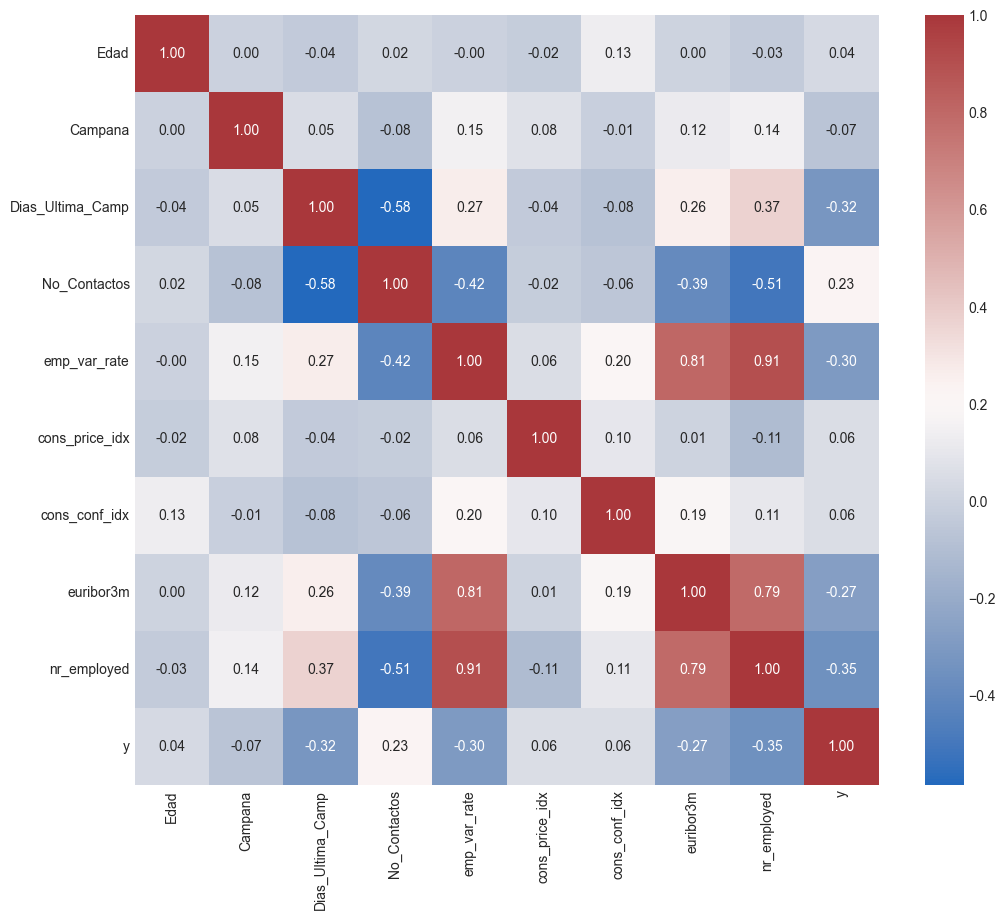

In [164]:
plt.subplots(figsize=(12,10))  
sns.heatmap(correlaciones, cmap = "vlag",annot = True,fmt=".2f")

Como se observa en el mapa de color de la correlacion hay una alta correlacion entre las variables **emp_var_rate**, **euribor3m**, **nr_employed**, grafiquemos para observar 

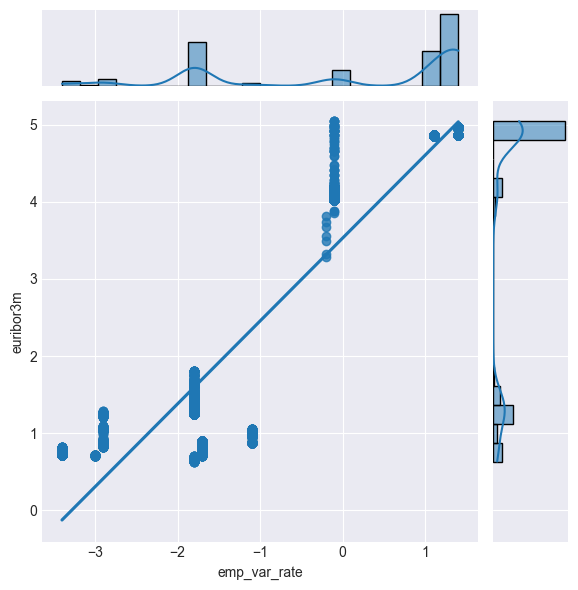

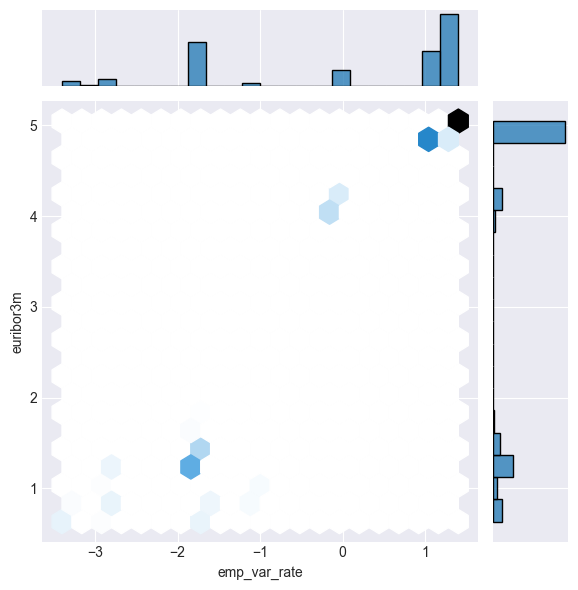

In [165]:
sns.jointplot(data=df_prep, x="emp_var_rate", y="euribor3m",kind="reg");
sns.jointplot(data=df_prep, x="emp_var_rate", y="euribor3m",kind="hex");

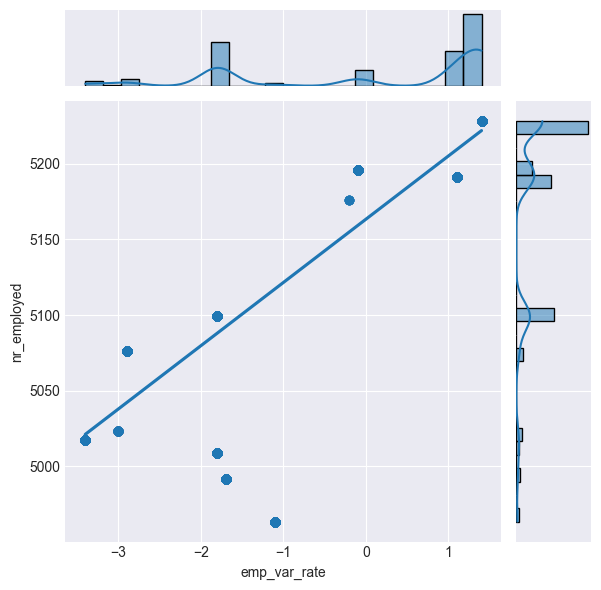

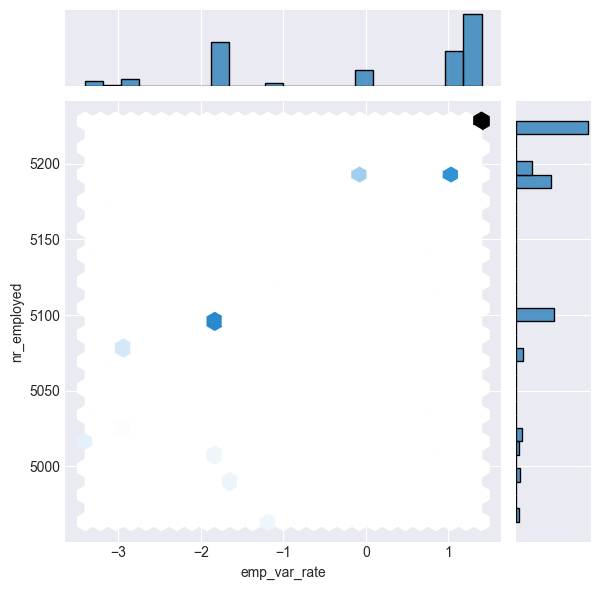

In [166]:
sns.jointplot(data=df_prep, x="emp_var_rate", y="nr_employed",kind="reg");
sns.jointplot(data=df_prep, x="emp_var_rate", y="nr_employed",kind="hex");

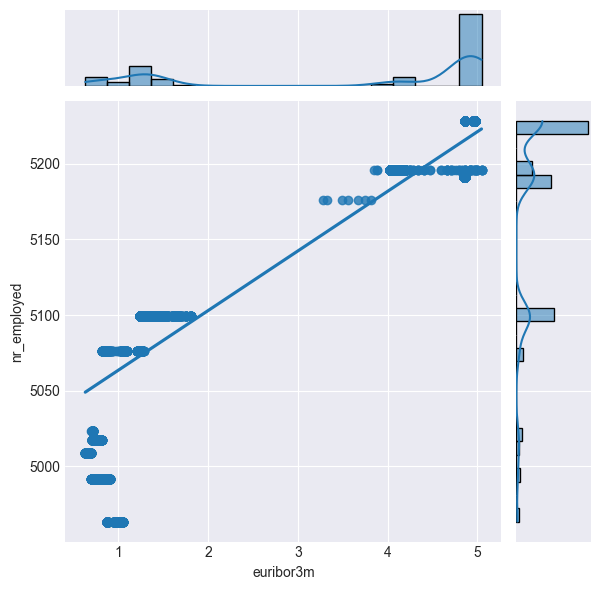

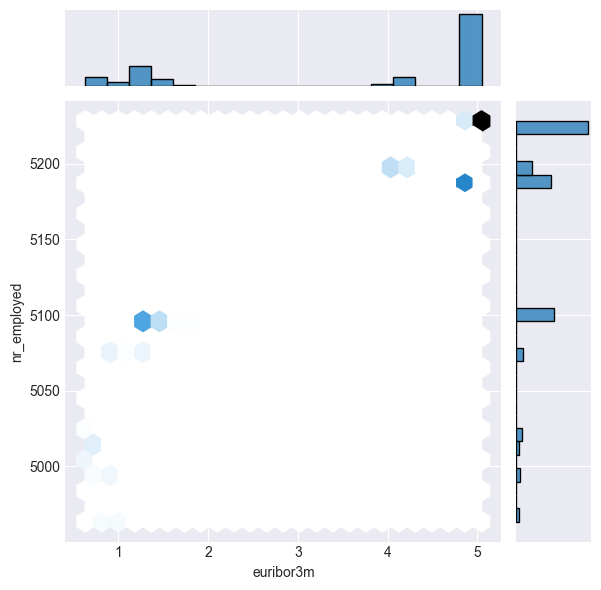

In [167]:
sns.jointplot(data=df_prep, x="euribor3m", y="nr_employed",kind="reg");
sns.jointplot(data=df_prep, x="euribor3m", y="nr_employed",kind="hex");

En las grafica anteriores podemos observar su correlación y tambien la densidad de puntos, la cual es, bastante alta entre las tres variables o caracteristicas.  
Antes de seleccionar las caracteristicas vamos a prepocesar los datos numericos 

In [168]:
# columnas numericas 
numeric

Index(['ID', 'Edad', 'Campana', 'Dias_Ultima_Camp', 'No_Contactos',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'y'],
      dtype='object')

In [169]:
# importando el preprocesado de datos minmaxescaler
from sklearn.preprocessing import MinMaxScaler

df_minmax_scaler=df_prep.copy(deep=True)
df_minmax_scaler[numeric[1:]]=MinMaxScaler().fit_transform(df_minmax_scaler[numeric[1:]])
# datos numericos transformados con minmaxscaler
df_minmax_scaler.set_index("ID",inplace=True)
df_minmax_scaler[numeric[1:]]


Edad  Campana  Dias_Ultima_Camp  No_Contactos  emp_var_rate  \
ID                                                                       
1      0.506494  0.00000               1.0      0.000000      0.937500   
2      0.246753  0.00000               1.0      0.000000      0.937500   
3      0.285714  0.00000               1.0      0.000000      0.937500   
4      0.493506  0.00000               1.0      0.000000      0.937500   
7      0.090909  0.00000               1.0      0.000000      0.937500   
...         ...      ...               ...           ...           ...   
32963  0.142857  0.00000               0.0      0.166667      0.479167   
32964  0.363636  0.00000               1.0      0.000000      0.479167   
32965  0.493506  0.02439               1.0      0.000000      0.479167   
32966  0.337662  0.00000               1.0      0.000000      0.479167   
32967  0.727273  0.04878               1.0      0.166667      0.479167   

       cons_price_idx  cons_conf_idx  euribor3m  nr_employed    y  
ID                                                                 
1            0.698753        0.60251   0.957379     0.859735  0.0  
2            0.698753        0.60251   0.957379     0.859735  0.0  
3            0.698753        0.60251   0.957379     0.859735  0.0  
4            0.698753        0.60251   0.957379     0.859735  0.0  
7            0.698753        0.60251   0.957379     0.859735  0.0  
...               ...            ...        ...          ...  ...  
32963        1.000000        0.00000   0.089322     0.000000  0.0  
32964        1.000000        0.00000   0.089322     0.000000  0.0  
32965        1.000000        0.00000   0.089322     0.000000  0.0  
32966        1.000000        0.00000   0.089322     0.000000  1.0  
32967        1.000000        0.00000   0.089322     0.000000  0.0  

[23099 rows x 10 columns]

Preticiones los datos en X y y, la concatenacion de los datos numericos y los categoricos utilizando la transformación onehotencoder 

In [170]:
X_numeric=df_minmax_scaler[numeric[1:-1]].values # caracteristicas numericas
y=df_minmax_scaler["y"].values # variable objetivo

Comparando que X_numeric sea correcto

In [171]:
aleatorio=np.random.randint(23098)
print(f"fila numero {aleatorio}")

print(f"\n array de X_numeric \n{X_numeric[aleatorio]}")
print(f"variable objetivo \n{y[np.random.randint(aleatorio)]}")
print("\n misma fila en el dataframe")
print(df_minmax_scaler[numeric[1:]].iloc[aleatorio].values)

fila numero 13969

 array de X_numeric 
[0.45454545 0.         1.         0.         0.6875     0.3893219
 0.36820084 0.80639311 0.8778828 ]
variable objetivo 
0.0

 misma fila en el dataframe
[0.45454545 0.         1.         0.         0.6875     0.3893219
 0.36820084 0.80639311 0.8778828  0.        ]


Ahora transformar la parte categorica 

In [172]:
from sklearn.preprocessing import OneHotEncoder
X_categoric=df_minmax_scaler[categoricas].values # X columnas categoricas
codificador=OneHotEncoder(handle_unknown='ignore') # codificador one hot
X_Cat_Onehot=codificador.fit_transform(X_categoric) # X tranformado por onehotencoder
print("Categorias \n")
print(codificador.categories_)

Categorias 

[array(['Vive de los arriendos', 'administrador negocio', 'ama de casa',
       'desempleado', 'empleado', 'emprendedor', 'estudiante',
       'pensionado', 'servicios', 'tecnico', 'unknown',
       'vendedor ambulante'], dtype=object), array(['casado', 'divorciado', 'soltero', 'unknown'], dtype=object), array(['Estudiante Universitario', 'Ninguno', 'bachillerato',
       'bachillerato incompleto', 'preescolar', 'pregrado', 'primaria',
       'unknown'], dtype=object), array(['no', 'si', 'unknown'], dtype=object), array(['no', 'si', 'unknown'], dtype=object), array(['no', 'si', 'unknown'], dtype=object), array(['celular', 'telefono fijo'], dtype=object), array(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep'], dtype=object), array(['fri', 'mon', 'thu', 'tue', 'wed'], dtype=object), array(['fallido', 'satisfactorio', 'sin contacto'], dtype=object)]


In [173]:
df_cat_onehot=pd.DataFrame(X_Cat_Onehot.toarray(),
                           columns=codificador.get_feature_names_out(categoricas))
df_cat_onehot.head() # data frame construido con las categorias transformadas por onehotencoder

Tipo_Trabajo_Vive de los arriendos  Tipo_Trabajo_administrador negocio  \
0                                 0.0                                 0.0   
1                                 0.0                                 0.0   
2                                 0.0                                 1.0   
3                                 0.0                                 0.0   
4                                 0.0                                 0.0   

   Tipo_Trabajo_ama de casa  Tipo_Trabajo_desempleado  Tipo_Trabajo_empleado  \
0                       0.0                       0.0                    0.0   
1                       0.0                       0.0                    0.0   
2                       0.0                       0.0                    0.0   
3                       0.0                       0.0                    0.0   
4                       0.0                       0.0                    0.0   

   Tipo_Trabajo_emprendedor  Tipo_Trabajo_estudiante  Tipo_Trabajo_pensionado  \
0                       0.0                      0.0                      0.0   
1                       0.0                      0.0                      0.0   
2                       0.0                      0.0                      0.0   
3                       0.0                      0.0                      0.0   
4                       0.0                      0.0                      0.0   

   Tipo_Trabajo_servicios  Tipo_Trabajo_tecnico  ...  Mes_oct  Mes_sep  \
0                     1.0                   0.0  ...      0.0      0.0   
1                     1.0                   0.0  ...      0.0      0.0   
2                     0.0                   0.0  ...      0.0      0.0   
3                     1.0                   0.0  ...      0.0      0.0   
4                     1.0                   0.0  ...      0.0      0.0   

   Dia_fri  Dia_mon  Dia_thu  Dia_tue  Dia_wed  Resultado_Anterior_fallido  \
0      0.0      1.0      0.0      0.0      0.0                         0.0   
1      0.0      1.0      0.0      0.0      0.0                         0.0   
2      0.0      1.0      0.0      0.0      0.0                         0.0   
3      0.0      1.0      0.0      0.0      0.0                         0.0   
4      0.0      1.0      0.0      0.0      0.0                         0.0   

   Resultado_Anterior_satisfactorio  Resultado_Anterior_sin contacto  
0                               0.0                              1.0  
1                               0.0                              1.0  
2                               0.0                              1.0  
3                               0.0                              1.0  
4                               0.0                              1.0  

[5 rows x 53 columns]

Probando una fila al azar para ver si la transformación esta bien 

In [174]:
aleatorio=np.random.randint(23098)
df_minmax_scaler[categoricas].reset_index().loc[aleatorio:aleatorio]

ID Tipo_Trabajo Estado_Civil                 Educacion mora  \
11165  15839      tecnico      soltero  Estudiante Universitario   no   

      Vivienda Consumo Contacto  Mes  Dia Resultado_Anterior  
11165       no      no  celular  aug  fri       sin contacto

In [175]:
pd.set_option("display.max_columns", 60)
display(df_cat_onehot.loc[aleatorio:aleatorio])
pd.set_option("display.max_columns", 20)

Tipo_Trabajo_Vive de los arriendos  Tipo_Trabajo_administrador negocio  \
11165                                 0.0                                 0.0   

       Tipo_Trabajo_ama de casa  Tipo_Trabajo_desempleado  \
11165                       0.0                       0.0   

       Tipo_Trabajo_empleado  Tipo_Trabajo_emprendedor  \
11165                    0.0                       0.0   

       Tipo_Trabajo_estudiante  Tipo_Trabajo_pensionado  \
11165                      0.0                      0.0   

       Tipo_Trabajo_servicios  Tipo_Trabajo_tecnico  Tipo_Trabajo_unknown  \
11165                     0.0                   1.0                   0.0   

       Tipo_Trabajo_vendedor ambulante  Estado_Civil_casado  \
11165                              0.0                  0.0   

       Estado_Civil_divorciado  Estado_Civil_soltero  Estado_Civil_unknown  \
11165                      0.0                   1.0                   0.0   

       Educacion_Estudiante Universitario  Educacion_Ninguno  \
11165                                 1.0                0.0   

       Educacion_bachillerato  Educacion_bachillerato incompleto  \
11165                     0.0                                0.0   

       Educacion_preescolar  Educacion_pregrado  Educacion_primaria  \
11165                   0.0                 0.0                 0.0   

       Educacion_unknown  mora_no  mora_si  mora_unknown  Vivienda_no  \
11165                0.0      1.0      0.0           0.0          1.0   

       Vivienda_si  Vivienda_unknown  Consumo_no  Consumo_si  Consumo_unknown  \
11165          0.0               0.0         1.0         0.0              0.0   

       Contacto_celular  Contacto_telefono fijo  Mes_apr  Mes_aug  Mes_dec  \
11165               1.0                     0.0      0.0      1.0      0.0   

       Mes_jul  Mes_jun  Mes_mar  Mes_may  Mes_nov  Mes_oct  Mes_sep  Dia_fri  \
11165      0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   

       Dia_mon  Dia_thu  Dia_tue  Dia_wed  Resultado_Anterior_fallido  \
11165      0.0      0.0      0.0      0.0                         0.0   

       Resultado_Anterior_satisfactorio  Resultado_Anterior_sin contacto  
11165                               0.0                              1.0

Se observa que la transformacion es correcta para este indice.  
Ahora falta concatenar la parte numerica y la categorica 

In [176]:
X_total=np.concatenate((X_numeric,X_Cat_Onehot.toarray()),axis=1)

Revisemos la longitudes

In [177]:
print(f"shape de X_numeric={X_numeric.shape}\n")
print(f"shape de X__Cat_Onehot={X_Cat_Onehot.shape}\n")
print(f"shape de X_total={X_total.shape}\n")

shape de X_numeric=(23099, 9)

shape de X__Cat_Onehot=(23099, 53)

shape de X_total=(23099, 62)



Las forma de X_total es correcta, ahora un indice aleatorio

In [178]:
aleatorio=np.random.randint(23098)
print(f"X_numeric\n{X_numeric[aleatorio]}")
print(f"X_Cat_Onehot\n{X_Cat_Onehot[aleatorio].toarray()}")
print(f"X_total\n{X_total[aleatorio]}")

X_numeric
[0.18181818 0.02439024 1.         0.         1.         0.48441154
 0.61506276 0.98141011 1.        ]
X_Cat_Onehot
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 1.]]
X_total
[0.18181818 0.02439024 1.         0.         1.         0.48441154
 0.61506276 0.98141011 1.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         1.
 0.         0.         0.         1.         0.         0.
 0.         0.         0.         1.         0.         0.
 1.         0.         0.         1.         0.         0.
 1.         0.         0.         1.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         1.        ]


Se observa que X_total es correcta 

Por último, en esta seccion se ralizara un PCA de los datos pero solo a las caracteristicas que presentan un alto grado de correlacion, ya que a pesar de tener una correlacion mayor a 0.7 como se ve en el mapa de calor de las correlaciones se podria perder algo de información, estas caracteristicas son **emp_var_rate**, **euribor3m**, **nr_employed**. Por otro, lado veamos si la correlación se mantiene 

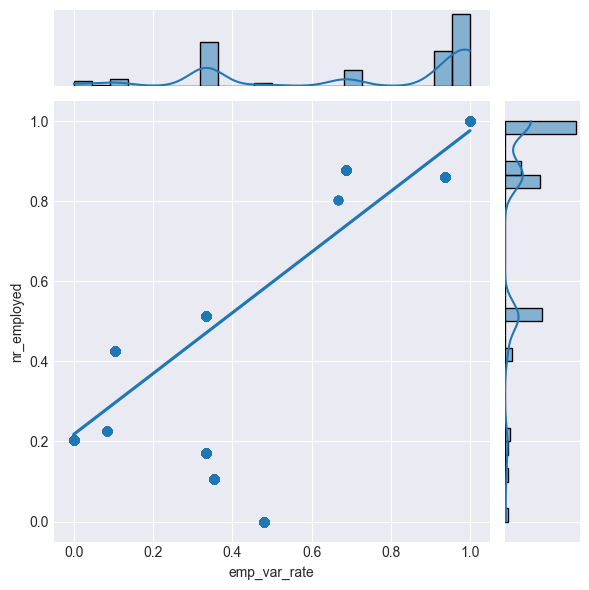

In [179]:
sns.jointplot(data=df_minmax_scaler, x="emp_var_rate", y="nr_employed",kind="reg");

Como se observa la correlacion se mantiene, despues de aplicar la transformacion MinMaxscaler.  
Ahora realicemos el PCA 



In [180]:
#revisando las tres caracteristicas 
caract_corr=["emp_var_rate","euribor3m","nr_employed"]
display(df_minmax_scaler[caract_corr].head(5))
X_corr=df_minmax_scaler[caract_corr].values
X_corr

emp_var_rate  euribor3m  nr_employed
ID                                      
1         0.9375   0.957379     0.859735
2         0.9375   0.957379     0.859735
3         0.9375   0.957379     0.859735
4         0.9375   0.957379     0.859735
7         0.9375   0.957379     0.859735

array([[0.9375    , 0.95737928, 0.85973535],
       [0.9375    , 0.95737928, 0.85973535],
       [0.9375    , 0.95737928, 0.85973535],
       ...,
       [0.47916667, 0.08932215, 0.        ],
       [0.47916667, 0.08932215, 0.        ],
       [0.47916667, 0.08932215, 0.        ]])

In [181]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_corr)
print("Proporción de varianza explicada\n",pca.explained_variance_ratio_)


Proporción de varianza explicada
 [0.96737044 0.02483243 0.00779713]


Vemos que la varianza explicada es muy alta en la primera componente mayor al 96%, por tanto, transformaremos en una sola componente  

In [182]:
from sklearn.decomposition import PCA
pcaf = PCA(n_components=1)
X_Pca=pcaf.fit_transform(X_corr)
print("componente principal obtenida con PCA  sobre las caracteristicas que presentan\n un alto grado de correlación\n",caract_corr)       
X_Pca

componente principal obtenida con PCA  sobre las caracteristicas que presentan
 un alto grado de correlación
 ['emp_var_rate', 'euribor3m', 'nr_employed']


array([[-0.34925126],
       [-0.34925126],
       [-0.34925126],
       ...,
       [ 0.90046572],
       [ 0.90046572],
       [ 0.90046572]])

Ahora construyamos de nuevo el vector X total 

In [183]:
#creamos un nuevo dataframe
df_Pca=df_minmax_scaler.copy(deep=True)
# le adicionamos la columna calculada con Pca
df_Pca["Pca emp_var_rate,euribor3m,nr_employed"]=X_Pca 
#borramos las columnas ['emp_var_rate', 'euribor3m', 'nr_employed'] y la columna y objetivo
df_Pca.drop(caract_corr,axis=1,inplace=True)
df_Pca.drop(["y"],axis=1,inplace=True)
#columnas numericas del dataframe df_pca
numeric_Pca=df_Pca._get_numeric_data().columns.values
#vusalizamos la parte numerica del dataframe
df_Pca[numeric_Pca]


Edad  Campana  Dias_Ultima_Camp  No_Contactos  cons_price_idx  \
ID                                                                         
1      0.506494  0.00000               1.0      0.000000        0.698753   
2      0.246753  0.00000               1.0      0.000000        0.698753   
3      0.285714  0.00000               1.0      0.000000        0.698753   
4      0.493506  0.00000               1.0      0.000000        0.698753   
7      0.090909  0.00000               1.0      0.000000        0.698753   
...         ...      ...               ...           ...             ...   
32963  0.142857  0.00000               0.0      0.166667        1.000000   
32964  0.363636  0.00000               1.0      0.000000        1.000000   
32965  0.493506  0.02439               1.0      0.000000        1.000000   
32966  0.337662  0.00000               1.0      0.000000        1.000000   
32967  0.727273  0.04878               1.0      0.166667        1.000000   

       cons_conf_idx  Pca emp_var_rate,euribor3m,nr_employed  
ID                                                            
1            0.60251                               -0.349251  
2            0.60251                               -0.349251  
3            0.60251                               -0.349251  
4            0.60251                               -0.349251  
7            0.60251                               -0.349251  
...              ...                                     ...  
32963        0.00000                                0.900466  
32964        0.00000                                0.900466  
32965        0.00000                                0.900466  
32966        0.00000                                0.900466  
32967        0.00000                                0.900466  

[23099 rows x 7 columns]

Ahora generamos el array X_numeric_Pca y lo contactenamos con X_Cat_Onehot, para crear el array X_total_Pca

In [184]:
X_numeric_Pca=df_Pca[numeric_Pca].values
X_total_Pca=np.concatenate((X_numeric_Pca,X_Cat_Onehot.toarray()),axis=1)


Ahora revicemos que se halla hecho el proceso de manera correcta

In [185]:
aleatorio=np.random.randint(23098)
print(f"X_numeric\n{X_numeric_Pca[aleatorio]}")
print(f"X_Cat_Onehot\n{X_Cat_Onehot[aleatorio].toarray()}")
print(f"X_total_Pca\n{X_total_Pca[aleatorio]}")

X_numeric
[0.7012987  0.         1.         0.         0.34060795 0.15481172
 0.68047175]
X_Cat_Onehot
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 1.]]
X_total_Pca
[0.7012987  0.         1.         0.         0.34060795 0.15481172
 0.68047175 0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         1.         0.         0.         1.         0.
 0.         1.         0.         0.         0.         1.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         1.        ]


In [186]:
df_Pca[numeric_Pca]

Edad  Campana  Dias_Ultima_Camp  No_Contactos  cons_price_idx  \
ID                                                                         
1      0.506494  0.00000               1.0      0.000000        0.698753   
2      0.246753  0.00000               1.0      0.000000        0.698753   
3      0.285714  0.00000               1.0      0.000000        0.698753   
4      0.493506  0.00000               1.0      0.000000        0.698753   
7      0.090909  0.00000               1.0      0.000000        0.698753   
...         ...      ...               ...           ...             ...   
32963  0.142857  0.00000               0.0      0.166667        1.000000   
32964  0.363636  0.00000               1.0      0.000000        1.000000   
32965  0.493506  0.02439               1.0      0.000000        1.000000   
32966  0.337662  0.00000               1.0      0.000000        1.000000   
32967  0.727273  0.04878               1.0      0.166667        1.000000   

       cons_conf_idx  Pca emp_var_rate,euribor3m,nr_employed  
ID                                                            
1            0.60251                               -0.349251  
2            0.60251                               -0.349251  
3            0.60251                               -0.349251  
4            0.60251                               -0.349251  
7            0.60251                               -0.349251  
...              ...                                     ...  
32963        0.00000                                0.900466  
32964        0.00000                                0.900466  
32965        0.00000                                0.900466  
32966        0.00000                                0.900466  
32967        0.00000                                0.900466  

[23099 rows x 7 columns]

Se observa que el resultado es correcto, por ultimo vamos a realizxar un split sobre nuestros datos en datos de entrenmiento y prueba 

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_total, 
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)
    
X_train_Pca, X_test_Pca, y_train_Pca, y_test_Pca = train_test_split(X_total_Pca, 
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

In [188]:
print(y_train_Pca==y_train)
print(y_test_Pca==y_test)
print(X_train==X_train_Pca)
print(X_test==X_test_Pca)

[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
False
False


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10876\3045616345.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(X_train==X_train_Pca)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10876\3045616345.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(X_test==X_test_Pca)


**y_train_Pca** y **y_train** son iguales ya que son las etiquetas y el random_state=42 es igual para ambos  casos con Pca y sin Pca, lo mismo pasa para test, mientras que, para las caracteristicas son diferentes es decir **X_train!=X_train_Pca**



Otra cosa importante sobre los datos es que se encuentran desbalanceados como se observo en el analisis de datos, la siguinte grafica muestra el desbalance de los datos de entrenamiento con Pca y sin Pca, el cual es el mismo 

<AxesSubplot:ylabel='Count'>

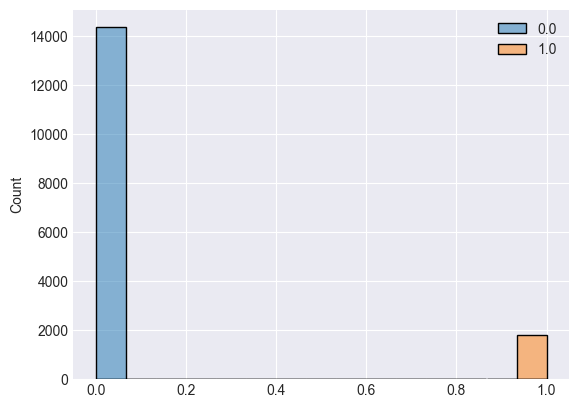

In [189]:
sns.histplot(x=y_train,hue=y_train)

In [191]:
import collections
print(collections.Counter(y_train))

Counter({0.0: 14356, 1.0: 1813})


Vemos que la etiqueta predominante en 0 que significa que no aceptara el credito el cliente.  
Teniendo en cuenta que los datos estan desbalanceados se trabajaran cuatro tipos de balanceos 


## 3.3 balanceo de datos 
En esta subceccion se balancearan los datos.
### 3.3.1 Tecnicas de oversampling
Son tecnicas donde se realiza una equilibrio de la clase minoritaria atraves, de la generacion de muestras sinteticas de dichas clase. 
#### 3.3.1.1 Synthetic Minority Over-Sampling Technique (SMOTE)
Esta tecnica se basa en la creacion de muestras sinteticas de la clase minoritaria teniendo en cuenta los k-vecinos mas cercanos.


In [192]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print("desbalanceo")
print(sorted(Counter(y_train).items()))
X_train_smote,y_train_smote=SMOTE(random_state=42,k_neighbors=3).fit_resample(X_train_Pca
                                                                              ,y_train_Pca)
print("balanceo")
print(sorted(Counter(y_train_smote).items()))

desbalanceo
[(0.0, 14356), (1.0, 1813)]
balanceo
[(0.0, 14356), (1.0, 14356)]


Este balanceo se raeliza sobre los datos de entrenamiento.

#### 3.3.1.1 Random Oversampling
Esta tecnica se basa en la creacion de muestras sinteticas que consiste en la duplicacion de las muestras existentes, es como generar mayor densidad en los puntos de la clase minoritaria .

In [193]:
from imblearn.over_sampling import RandomOverSampler
print("desbalanceo")
print(sorted(Counter(y_train).items()))
X_train_rand_over,y_train_rand_over=RandomOverSampler(random_state=42).fit_resample(X_train_Pca
                                                                              ,y_train_Pca)
print("balanceo")
print(sorted(Counter(y_train_rand_over).items()))

desbalanceo
[(0.0, 14356), (1.0, 1813)]
balanceo
[(0.0, 14356), (1.0, 14356)]


Como se observa en las salidas anteriores, las clases quedan balanceadas con 14356 datos cada una.

#### 3.3.1.1 Synthetic Minority Over-Sampling Technique (BorderlineSMOTE)
Esta tecnica se basa en la creacion de muestras sinteticas de la clase minoritaria, intentando encontrar el umbral o frontera entre ambas clases. 

In [194]:
from imblearn.over_sampling import BorderlineSMOTE
print("desbalanceo")
print(sorted(Counter(y_train).items()))
X_train_bor_smote,y_train_bor_smote=BorderlineSMOTE(random_state=42,
                                                k_neighbors=5).fit_resample(X_train_Pca
                                                                              ,y_train_Pca)
print("balanceo")
print(sorted(Counter(y_train_bor_smote).items()))

desbalanceo
[(0.0, 14356), (1.0, 1813)]
balanceo
[(0.0, 14356), (1.0, 14356)]


## 3.3.2 Tecnicas de under sampling
Las tecnicas de under samplig lo que hacen es tomar muestras de la clase mayoritaria hasta que sea la misma cantidad de la cxlase minoritaria 

#### 3.3.2.1 Random Undersampling
Toma un numero de muestras de la calse mayoritaria de forma aleatoria igual al numero de muestras de la clase minoritaria 

In [195]:
from imblearn.under_sampling import RandomUnderSampler
print("desbalanceo")
print(sorted(Counter(y_train).items()))
X_train_rand_under,y_train_rand_under=RandomUnderSampler(random_state=42).fit_resample(X_train_Pca
                                                                              ,y_train_Pca)
print("balanceo")
print(sorted(Counter(y_train_rand_under).items()))





desbalanceo
[(0.0, 14356), (1.0, 1813)]
balanceo
[(0.0, 1813), (1.0, 1813)]


#### 3.3.2.2 Nearmiss Undersampling
Esta tecnica utiliza los vecinos mas cercanos para remuestrar la clase mayoritaria, seleccionando muestras de tal manera que la distancia promedio entre miembros de la clase mayoritaria sea la la mas pequeña

In [196]:
from imblearn.under_sampling import NearMiss
print("desbalanceo")
print(sorted(Counter(y_train).items()))
X_train_miss,y_train_miss=NearMiss().fit_resample(X_train_Pca,y_train_Pca)
print("balanceo")
print(sorted(Counter(y_train_miss).items()))

desbalanceo
[(0.0, 14356), (1.0, 1813)]
balanceo
[(0.0, 1813), (1.0, 1813)]


Como se sobserva en las salida anteriores la cantidad de muestras queda balanceada en ambas clases a 1813, cantidad de la clase minoritaria 

# 4 Modelamiento 
En esta seccion se escojeran los modelos para aprendisaje supervisado, se realiza la experimentacion de los mismos y se contruiran los modelos finales a ser evaluados en la siguiente unidad. Los datos que se utilizaran son los diferentes conjuntos construidos en la seccion anterior, tales como, PCA, undersampling, oversamplig etc. 

## 4.1 Seleccion de un modelo apropiado 
Teniendo en cuenta que este es un problema de clasificacion supervizado ya que se conocen las etiquetas, se utlizaran los siguientes modelos que se importaran a continuación.  

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
# para validacion cruzada y variacion de hiperparametros
from sklearn.model_selection import GridSearchCV


## 4.2 Diseño y experimentación de validacion cruzada
### 4.2.1 modelo LogisticRegression
Obtengamos los hiperparametros del modelo

In [2]:
mol_log_reg=LogisticRegression()
print(mol_log_reg.get_params())


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [3]:
# hiperparametros a variar 
par_log_reg={"fit_intercept":[True,False],"max_iter":[500,1000,2000],
             "random_state":[0,42],"penalty": ['l1','l2','none'],'C': [0.001,0.1,1,3]}

Lista con cada conjunto X,y de entreamiento costruidos con Over y under sampling

In [530]:
X_train_lista=[X_train_Pca,X_train_rand_over,X_train_smote,X_train_bor_smote,X_train_rand_under
,X_train_miss]

y_train_lista=[y_train_Pca,y_train_rand_over,y_train_smote,y_train_bor_smote,y_train_rand_under
,y_train_miss]

siglas=["_Pca","_rand_over","_smote","_bor_smote","_rand_under","_miss"]


Costruyendo un dicionario con cada validacion cruzada para cada elemento de las listas X_train_lista, y_train_lista

In [532]:
%%time
from tqdm.auto import tqdm
dict_Log_reg={}
name="Modelo_CV_Log_reg"
for i,Xt,yt in tqdm(zip(siglas,X_train_lista,y_train_lista)):
    grilla=GridSearchCV(mol_log_reg,param_grid=par_log_reg,
                            cv=5,scoring=["precision","accuracy", "recall","f1"],
                            refit="accuracy",n_jobs=7)
    modeloentrenado=grilla.fit(Xt,yt)       
    dict_Log_reg[name+i]=modeloentrenado
    
    

0it [00:00, ?it/s]

C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USUARIO\AppData\Local\Pr

C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USUARIO\AppData\Local\Pr

C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USUARIO\AppData\Local\Pr

C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USUARIO\AppData\Local\Pr

C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USUARIO\AppData\Local\Pr

C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USUARIO\AppData\Local\Pr

CPU times: total: 6.25 s
Wall time: 3min 54s


*El warning solo dice que si no hay penalty se ignora el valor de C*, lo cual, no es problema

In [496]:
# nombres de cada grilla de validacion cruzada, que a sido entrenada 
dict_Log_reg.keys()

dict_keys(['Modelo_CV_Log_reg_Pca', 'Modelo_CV_Log_reg_rand_over', 'Modelo_CV_Log_reg_smote', 'Modelo_CV_Log_reg_bor_smote', 'Modelo_CV_Log_reg_rand_under', 'Modelo_CV_Log_reg_miss'])

Ahora definimos una función para ver las diferentes metricas que se evaluan en el modelo 

In [576]:
#De cada metrica de cada modelo con sus respectivos hiperparametros 
def metricas(modelfit):
    dic_result=modelfit.cv_results_
    for mean_precision,mean_accuracy ,mean_recall,mean_test_f1, params in zip(
        dic_result["mean_test_precision"],
        dic_result["mean_test_accuracy"],
        dic_result["mean_test_recall"],
        dic_result["mean_test_f1"],
        dic_result["params"],
    ):
         print(
            f"precision: {mean_precision:0.3f} ,"
            f" accuracy: {mean_accuracy:0.3f} ,"
            f" recall: {mean_recall:0.3f} ,"
            f" f1_score: {mean_test_f1:0.3f} ,"
            f" for {params}\n"
        )

Podemos utlizara la funcion y ver el resultado de el tuning y CV sobre cada uno de los conjuntos de datos, la sigla de cada datp corresponde a cada conjunto de modelos. 

In [535]:
for i in dict_Log_reg.keys():
    print('\033[1m' +f"{i}")           
    print("'\033[0m con sus las metricas\n")
    metricas(dict_Log_reg[i])

Modelo_CV_Log_reg_Pca
' con sus las metricas

precision: nan , accuracy: nan , recall: nan , f1_score: nan , for {'C': 0.001, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l1', 'random_state': 0}

precision: nan , accuracy: nan , recall: nan , f1_score: nan , for {'C': 0.001, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l1', 'random_state': 42}

precision: 0.000 , accuracy: 0.888 , recall: 0.000 , f1_score: 0.000 , for {'C': 0.001, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l2', 'random_state': 0}

precision: 0.000 , accuracy: 0.888 , recall: 0.000 , f1_score: 0.000 , for {'C': 0.001, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l2', 'random_state': 42}

precision: 0.643 , accuracy: 0.899 , recall: 0.218 , f1_score: 0.325 , for {'C': 0.001, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'none', 'random_state': 0}

precision: 0.643 , accuracy: 0.899 , recall: 0.218 , f1_score: 0.325 , for {'C': 0.001, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'n

Tambien se puede obtener el mejor modelo con la metrica que los rankea o ordena la cua es, el accuracy para este caso 

In [536]:
for i in dict_Log_reg.keys():
    print('\033[1m' +f"{i}")           
    print("'\033[0m mejor modelo con la metrica accuracy para cada conjunto de datos")
    print("accuracy=",dict_Log_reg[i].best_score_)
    print("Hiperparametros del mejor modelo")
    print("Hiperparametros=",dict_Log_reg[i].best_params_)
    
    print()

Modelo_CV_Log_reg_Pca
' mejor modelo con la metrica accuracy para cada conjunto de datos
accuracy= 0.898818614699486
Hiperparametros del mejor modelo
Hiperparametros= {'C': 3, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l2', 'random_state': 0}

Modelo_CV_Log_reg_rand_over
' mejor modelo con la metrica accuracy para cada conjunto de datos
accuracy= 0.7389940704698701
Hiperparametros del mejor modelo
Hiperparametros= {'C': 0.001, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'none', 'random_state': 0}

Modelo_CV_Log_reg_smote
' mejor modelo con la metrica accuracy para cada conjunto de datos
accuracy= 0.7436615247323336
Hiperparametros del mejor modelo
Hiperparametros= {'C': 0.001, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'none', 'random_state': 0}

Modelo_CV_Log_reg_bor_smote
' mejor modelo con la metrica accuracy para cada conjunto de datos
accuracy= 0.7703054914640833
Hiperparametros del mejor modelo
Hiperparametros= {'C': 0.001, 'fit_intercept': True, 'max_iter

De los modelos anteriores se puede revisar el resto de las metricas y escojer si es optimo el modelo, ademas de que datos hacen optimo este modelo.

### 4.2.2 Arboles de decisión

In [544]:
mol_tree=DecisionTreeClassifier()

Sus hiperparametros son 

In [545]:
mol_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [546]:
# hiperparametros a variar 
param_tree={"class_weight":["balanced"],
            "max_depth": list(range(3,40)),"criterion":['gini',"entropy"]
            ,"random_state":[0,42],'min_samples_leaf': [1,2,3]}

In [555]:
%%time
from tqdm.auto import tqdm
dict_desicion_tree={}
name="Modelo_desicion_tree"
for i,Xt,yt in tqdm(zip(siglas,X_train_lista,y_train_lista)):

            grilla2=GridSearchCV(mol_tree,param_tree,
                            cv=10,scoring=["precision","accuracy", "recall","f1"],
                            refit="accuracy",n_jobs=7)
            modeloentrenado2=grilla2.fit(Xt,yt)       
            dict_desicion_tree[name+i]=modeloentrenado2

0it [00:00, ?it/s]

CPU times: total: 17.1 s
Wall time: 8min 47s


Metricas para todos los modelos creados con cada conjunto de datos 

In [556]:
for i in dict_desicion_tree.keys():
    print('\033[1m' +f"{i}")           
    print("'\033[0m con sus las metricas\n")
    metricas(dict_desicion_tree[i])

Modelo_desicion_tree_Pca
' con sus las metricas

precision: 0.355 , accuracy: 0.833 , recall: 0.597 , f1_score: 0.445 , for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'random_state': 0}

precision: 0.355 , accuracy: 0.833 , recall: 0.597 , f1_score: 0.445 , for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'random_state': 42}

precision: 0.355 , accuracy: 0.833 , recall: 0.597 , f1_score: 0.445 , for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'random_state': 0}

precision: 0.355 , accuracy: 0.833 , recall: 0.597 , f1_score: 0.445 , for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'random_state': 42}

precision: 0.355 , accuracy: 0.833 , recall: 0.597 , f1_score: 0.445 , for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'random_state': 0}

precision: 0.355 , accuracy: 

Mejores modelos con la metrica accuracy, sin embargo, con la salida anterior se puede ver todas las otras metricas 

In [557]:
for i in dict_desicion_tree.keys():
    print('\033[1m' +f"{i}")           
    print("'\033[0m mejor modelo con la metrica accuracy para cada conjunto de datos")
    print("accuracy=",dict_desicion_tree[i].best_score_)
    print("Hiperparametros del mejor modelo")
    print("Hiperparametros=",dict_desicion_tree[i].best_params_)
    print()

Modelo_desicion_tree_Pca
' mejor modelo con la metrica accuracy para cada conjunto de datos
accuracy= 0.8461247145122675
Hiperparametros del mejor modelo
Hiperparametros= {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'random_state': 42}

Modelo_desicion_tree_rand_over
' mejor modelo con la metrica accuracy para cada conjunto de datos
accuracy= 0.9493242384463209
Hiperparametros del mejor modelo
Hiperparametros= {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 36, 'min_samples_leaf': 1, 'random_state': 42}

Modelo_desicion_tree_smote
' mejor modelo con la metrica accuracy para cada conjunto de datos
accuracy= 0.9066681971962444
Hiperparametros del mejor modelo
Hiperparametros= {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'random_state': 42}

Modelo_desicion_tree_bor_smote
' mejor modelo con la metrica accuracy para cada conjunto de datos
accuracy= 0.9094896472165708
Hiperparametros d

Ya teniendo las metricas de cada uno de los modelos, podemos escojer el modelo a entrenar y los datos a entrenar de manera correcta.
Ahora veamos la importancia de las caracteristicas para los modelos 

In [558]:
#Nombre de las caracteristicas
idx=pd.concat([df_Pca[numeric_Pca].reset_index(),df_cat_onehot],axis=1).columns[1:]
from ipywidgets import interact
@interact(featur_import=list(dict_desicion_tree.keys()))
def grafcaracteristicas(featur_import):
    val=dict_desicion_tree[featur_import].best_estimator_.feature_importances_*100
    s=pd.Series(val,index=idx)
    s=s.sort_values(ascending=True)
    ax = s.plot.barh(figsize=(10,20))
    ax.tick_params(labelsize=12)
    ax.set_title("Importancia de las caracteristicas en la clasificacion por arbol de decision en porcentaje")
    print("caracteristicas en orden de importancia para el modelo\n")
    print('\033[1m' +f"{featur_import}".center(110)) 
    print('\033[0m')
    ax.figure.tight_layout()
    plt.show()              
   

interactive(children=(Dropdown(description='featur_import', options=('Modelo_desicion_tree_Pca', 'Modelo_desic…

vemos que las caracteristicas mas importantes para que alguien acceda a un cretido es las variables que estan asiciadas a la economia social

### 4.2.3 Bosques aleatorios

In [568]:
mod_rand_forest=RandomForestClassifier()

Obtenemos sus hiperparametros 

In [569]:
mod_rand_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [573]:
# hiperparametros a variar 
param_forest={"class_weight": ["balanced"],"criterion":['gini',"entropy"],
             'n_estimators': [20,50,100,150,200],'min_samples_leaf':[1,3,5],
             'random_state': [0,42],'max_samples': [1/3,2/3],'max_depth':[10,30,50]}

In [574]:
%%time
from tqdm.auto import tqdm
dict_Random_Forest={}
name="Modelo_Random_Forest"
for i,Xt,yt in tqdm(zip(siglas,X_train_lista,y_train_lista)):

            grilla3=GridSearchCV(mod_rand_forest,param_forest,
                            cv=5,scoring=["precision","accuracy", "recall","f1"],
                            refit="accuracy",n_jobs=7)
            modeloentrenado3=grilla3.fit(Xt,yt)       
            dict_Random_Forest[name+i]=modeloentrenado3

0it [00:00, ?it/s]

CPU times: total: 13.9 s
Wall time: 22min 27s


Metricas para todos los modelos creados con cada conjunto de datos 

In [577]:
for i in dict_Random_Forest.keys():
    print('\033[1m' +f"{i}")           
    print("'\033[0m con sus las metricas\n")
    metricas(dict_Random_Forest[i])

Modelo_Random_Forest_Pca
' con sus las metricas

precision: 0.422 , accuracy: 0.866 , recall: 0.512 , f1_score: 0.462 , for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_samples': 0.3333333333333333, 'min_samples_leaf': 1, 'n_estimators': 20, 'random_state': 0}

precision: 0.428 , accuracy: 0.868 , recall: 0.520 , f1_score: 0.470 , for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_samples': 0.3333333333333333, 'min_samples_leaf': 1, 'n_estimators': 20, 'random_state': 42}

precision: 0.433 , accuracy: 0.870 , recall: 0.526 , f1_score: 0.475 , for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_samples': 0.3333333333333333, 'min_samples_leaf': 1, 'n_estimators': 50, 'random_state': 0}

precision: 0.436 , accuracy: 0.870 , recall: 0.522 , f1_score: 0.475 , for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_samples': 0.3333333333333333, 'min_samples_leaf': 1, 'n_estimators': 50, 'random_st

Mejores modelos con la metrica accuracy, sin embargo, con la salida anterior se puede ver todas las otras metricas 

In [578]:
for i in dict_Random_Forest.keys():
    print('\033[1m' +f"{i}")           
    print("'\033[0m mejor modelo con la metrica accuracy para cada conjunto de datos")
    print("accuracy=",dict_Random_Forest[i].best_score_)
    print("Hiperparametros del mejor modelo")
    print("Hiperparametros=",dict_Random_Forest[i].best_params_)
    print()

Modelo_Random_Forest_Pca
' mejor modelo con la metrica accuracy para cada conjunto de datos
accuracy= 0.8999938979612878
Hiperparametros del mejor modelo
Hiperparametros= {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 30, 'max_samples': 0.3333333333333333, 'min_samples_leaf': 1, 'n_estimators': 50, 'random_state': 42}

Modelo_Random_Forest_rand_over
' mejor modelo con la metrica accuracy para cada conjunto de datos
accuracy= 0.9615491559303215
Hiperparametros del mejor modelo
Hiperparametros= {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_samples': 0.6666666666666666, 'min_samples_leaf': 1, 'n_estimators': 20, 'random_state': 42}

Modelo_Random_Forest_smote
' mejor modelo con la metrica accuracy para cada conjunto de datos
accuracy= 0.9410381077856325
Hiperparametros del mejor modelo
Hiperparametros= {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 30, 'max_samples': 0.6666666666666666, 'min_samples_leaf': 1, 'n_estimators': 150

Ahora grafiquemos la importancia de las caracteristicas 

In [579]:
#Nombre de las caracteristicas
idx=pd.concat([df_Pca[numeric_Pca].reset_index(),df_cat_onehot],axis=1).columns[1:]
from ipywidgets import interact
@interact(featur_import=list(dict_Random_Forest.keys()))
def grafcaracteristicas(featur_import):
    val=dict_Random_Forest[featur_import].best_estimator_.feature_importances_*100
    s=pd.Series(val,index=idx)
    s=s.sort_values(ascending=True)
    ax = s.plot.barh(figsize=(10,20))
    ax.tick_params(labelsize=12)
    ax.set_title("Importancia de las caracteristicas en la clasificacion para random forest")
    print("caracteristicas en orden de importancia para el modelo\n")
    print('\033[1m' +f"{featur_import}".center(110)) 
    print('\033[0m')
    ax.figure.tight_layout()
    plt.show()  

interactive(children=(Dropdown(description='featur_import', options=('Modelo_Random_Forest_Pca', 'Modelo_Rando…

Se observa como la importancia de la economia social disminuye y caracteristicas como la edad y campana que son el numero de contactos realizados al cliente toman importancia. Lo cual, esta de acuerdo con la importancia de las campañas de marketing  

### 4.3.4 Maquinas de soporte vectorial 

In [79]:
mod_Svc=svm.SVC()

Obtenemos sus hiperparametros 

In [80]:
mod_Svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [81]:
# hiperparametros a variar 
param_svm={'C': [0.1,0.5,1],'gamma':[0.01,0.1],'kernel':['linear',"rbf", "sigmoid", "poly"],
           'random_state':[42]}

In [82]:
%%time
from joblib import parallel_backend
with parallel_backend('threading', n_jobs=7):
    from tqdm.auto import tqdm
    dict_Svm={}
    name="Modelo_Soporte_Vectorial"
    for i,Xt,yt in tqdm(zip(siglas,X_train_lista,y_train_lista)):

            grilla4=GridSearchCV(mod_Svc,param_svm,
                            cv=5,scoring=["precision","accuracy", "recall","f1"],
                            refit="accuracy")
            modeloentrenado4=grilla4.fit(Xt,yt)       
            dict_Svm[name+i]=modeloentrenado4

0it [00:00, ?it/s]

C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USUARIO\AppDa

C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USUARIO\AppDa

CPU times: total: 2h 40min 56s
Wall time: 1h 6min 10s


Metricas para todos los modelos creados con cada conjunto de datos, vemos que el wraning es para lagunos conjuntos de hiperparametros que no logran clasificar , esto debe ser por las clases desbalanceadas  

In [500]:
for i in dict_Svm.keys():
    print('\033[1m' +f"{i}")           
    print("'\033[0m con sus las metricas\n")
    metricas(dict_Svm[i])

Modelo_Soporte_Vectorial_Pca
' con sus las metricas

precision: 0.638 , accuracy: 0.897 , recall: 0.188 , f1_score: 0.290 , for {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear', 'random_state': 42}

precision: 0.000 , accuracy: 0.888 , recall: 0.000 , f1_score: 0.000 , for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf', 'random_state': 42}

precision: 0.000 , accuracy: 0.888 , recall: 0.000 , f1_score: 0.000 , for {'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid', 'random_state': 42}

precision: 0.000 , accuracy: 0.888 , recall: 0.000 , f1_score: 0.000 , for {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly', 'random_state': 42}

precision: 0.638 , accuracy: 0.897 , recall: 0.188 , f1_score: 0.290 , for {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 42}

precision: 0.637 , accuracy: 0.897 , recall: 0.187 , f1_score: 0.289 , for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 42}

precision: 0.626 , accuracy: 0.895 , recall: 0.157 , f1_score: 0.250 , for {'C': 0.1, 'gamma': 0.1, 'ker

Mejores modelos con la metrica accuracy, sin embargo, con la salida anterior se puede ver todas las otras metricas 

In [501]:
for i in dict_Svm.keys():
    print('\033[1m' +f"{i}")           
    print("'\033[0m mejor modelo con la metrica accuracy para cada conjunto de datos")
    print("accuracy=",dict_Svm[i].best_score_)
    print("Hiperparametros del mejor modelo")
    print("Hiperparametros=",dict_Svm[i].best_params_)
    print()

Modelo_Soporte_Vectorial_Pca
' mejor modelo con la metrica accuracy para cada conjunto de datos
accuracy= 0.8983238139616561
Hiperparametros del mejor modelo
Hiperparametros= {'C': 0.5, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 42}

Modelo_Soporte_Vectorial_rand_over
' mejor modelo con la metrica accuracy para cada conjunto de datos
accuracy= 0.7883460749060249
Hiperparametros del mejor modelo
Hiperparametros= {'C': 1, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 42}

Modelo_Soporte_Vectorial_smote
' mejor modelo con la metrica accuracy para cada conjunto de datos
accuracy= 0.8804361470930067
Hiperparametros del mejor modelo
Hiperparametros= {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 42}

Modelo_Soporte_Vectorial_bor_smote
' mejor modelo con la metrica accuracy para cada conjunto de datos
accuracy= 0.8916508537978753
Hiperparametros del mejor modelo
Hiperparametros= {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 42}

Modelo_Soporte_Vectorial_rand_under
' 

### 4.3.5 Red neuronal 

In [480]:
mod_neuronal=MLPClassifier()

Obtenemos sus hiperparametros 

In [481]:
mod_neuronal.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [490]:
# hiperparametros a variar 
param_neuronal={'alpha': [0.0001],'solver': ['lbfgs', 'sgd'],'activation': ['relu','identity',"logistic"],
                'learning_rate': ['constant','adaptive'], 'max_iter': [500],'hidden_layer_sizes': [(100,),(200,)],
               'random_state':[42]}

In [492]:
%%time
from joblib import parallel_backend

from tqdm.notebook import tqdm
dict_neuronal={}
name="Modelo_Red_Neuronal"
for i,Xt,yt in tqdm(zip(siglas,X_train_lista,y_train_lista)):

        grilla5=GridSearchCV(mod_neuronal,param_neuronal,
                            cv=5,scoring=["precision","accuracy", "recall","f1"],
                            refit="accuracy",n_jobs=7)
        modeloentrenado5=grilla5.fit(Xt,yt)       
        dict_neuronal[name+i]=modeloentrenado5

0it [00:00, ?it/s]

C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_pe

CPU times: total: 3min 51s
Wall time: 40min 23s


Metricas para todos los modelos creados con cada conjunto de datos, vemos que el wraning es para lagunos conjuntos de hiperparametros que no logran clasificar , esto debe ser por las clases desbalanceadas  

In [503]:
for i in dict_neuronal.keys():
    print('\033[1m' +f"{i}")           
    print("'\033[0m con sus las metricas\n")
    metricas(dict_neuronal[i])

Modelo_Red_Neuronal_Pca
' con sus las metricas

precision: 0.317 , accuracy: 0.851 , recall: 0.288 , f1_score: 0.302 , for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 500, 'random_state': 42, 'solver': 'lbfgs'}

precision: 0.649 , accuracy: 0.898 , recall: 0.189 , f1_score: 0.292 , for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 500, 'random_state': 42, 'solver': 'sgd'}

precision: 0.317 , accuracy: 0.851 , recall: 0.288 , f1_score: 0.302 , for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'max_iter': 500, 'random_state': 42, 'solver': 'lbfgs'}

precision: 0.646 , accuracy: 0.898 , recall: 0.189 , f1_score: 0.292 , for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'max_iter': 500, 'random_state': 42, 'solver': 'sgd'}

precision: 0.310 , accuracy: 0.8

Mejores modelos con la metrica accuracy, sin embargo, con la salida anterior se puede ver todas las otras metricas 

In [504]:
for i in dict_neuronal.keys():
    print('\033[1m' +f"{i}")           
    print("'\033[0m mejor modelo con la metrica accuracy para cada conjunto de datos")
    print("accuracy=",dict_neuronal[i].best_score_)
    print("Hiperparametros del mejor modelo")
    print("Hiperparametros=",dict_neuronal[i].best_params_)
    print()

Modelo_Red_Neuronal_Pca
' mejor modelo con la metrica accuracy para cada conjunto de datos
accuracy= 0.8986949288615145
Hiperparametros del mejor modelo
Hiperparametros= {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'max_iter': 500, 'random_state': 42, 'solver': 'lbfgs'}

Modelo_Red_Neuronal_rand_over
' mejor modelo con la metrica accuracy para cada conjunto de datos
accuracy= 0.9218444236901489
Hiperparametros del mejor modelo
Hiperparametros= {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'max_iter': 500, 'random_state': 42, 'solver': 'lbfgs'}

Modelo_Red_Neuronal_smote
' mejor modelo con la metrica accuracy para cada conjunto de datos
accuracy= 0.920767414033579
Hiperparametros del mejor modelo
Hiperparametros= {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'max_iter': 500, 'random_state': 42, 'solver': 'lbfgs'}

Modelo_Red_

No se probaran mas modelos, por tro lado, el mas demorado es las redes neuronales a pesar de contar con varios nucleos en la ejecucion.

## 4.4 Entrenado los mejores modelos con sus respectivos datos
En esta subsección se escojera  los mejores hiperparametros de modelos entrenados anteriormente para cada uno de los tipos de datos y se entrenara sobre todos los datos de entrenamiento para en la siguiente sección evaluarlos sobre los datos de prueba. 

### 4.4.1 Mejores modelos de regresión logistica 
Escojamos los mejores modelos de regresión logistica


In [538]:
# mejores hiperparametros los mejores modelos de regresión logistica
lista_mejores_parametros_reg_log=[
     dict_Log_reg[i].best_params_ for i in dict_Log_reg.keys()]
for i,j in zip(dict_Log_reg.keys(),lista_mejores_parametros_reg_log):
    print('\033[1m',i)
    print('\033[0m',j)
    print()

 Modelo_CV_Log_reg_Pca
 {'C': 3, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l2', 'random_state': 42}

 Modelo_CV_Log_reg_rand_over
 {'C': 0.1, 'fit_intercept': False, 'max_iter': 500, 'penalty': 'none', 'random_state': 42}

 Modelo_CV_Log_reg_smote
 {'C': 0.1, 'fit_intercept': False, 'max_iter': 500, 'penalty': 'none', 'random_state': 42}

 Modelo_CV_Log_reg_bor_smote
 {'C': 0.1, 'fit_intercept': False, 'max_iter': 500, 'penalty': 'none', 'random_state': 42}

 Modelo_CV_Log_reg_rand_under
 {'C': 0.1, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l2', 'random_state': 42}

 Modelo_CV_Log_reg_miss
 {'C': 0.1, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'none', 'random_state': 42}



In [831]:
dict_mejores_models_reg_log={}
for i,j,Xt,yt in zip(siglas,lista_mejores_parametros_reg_log,X_train_lista,y_train_lista):
    name1="Mejor_modelo_reg_log"
    mejormodelo=LogisticRegression(**j)
    dict_mejores_models_reg_log[name1+i]=mejormodelo.fit(Xt,yt)

    



C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


### 4.4.2 Mejores modelos arbol de decisión
Escojamos los mejores modelos de arboles de decision para cada conjunto de datos 

In [561]:
#Hiperparametros de los mejores modelos arbol de decisión
lista_mejores_parametros_decision_tree=[
     dict_desicion_tree[i].best_params_ for i in dict_desicion_tree.keys()]
for i,j in zip(dict_desicion_tree.keys(),lista_mejores_parametros_decision_tree):
    print('\033[1m',i)
    print('\033[0m',j)
    print()

 Modelo_desicion_tree_Pca
 {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'random_state': 42}

 Modelo_desicion_tree_rand_over
 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 36, 'min_samples_leaf': 1, 'random_state': 42}

 Modelo_desicion_tree_smote
 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'random_state': 42}

 Modelo_desicion_tree_bor_smote
 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'random_state': 42}

 Modelo_desicion_tree_rand_under
 {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'random_state': 42}

 Modelo_desicion_tree_miss
 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'random_state': 0}



In [563]:
dict_mejores_models_decision_tree={}
for i,j,Xt,yt in zip(siglas,lista_mejores_parametros_decision_tree,X_train_lista,y_train_lista):
    name1="Mejor_modelo_decision_tree"
    mejormodelo1=DecisionTreeClassifier(**j)
    dict_mejores_models_decision_tree[name1+i]=mejormodelo1.fit(Xt,yt)

### 4.4.3 Mejores modelos de random forest 
Escojamos los mejores modelos de bosques aleatorios 

In [580]:
#Hiperparametros de los mejores modelos random forest
lista_mejores_parametros_random_forest=[
     dict_Random_Forest[i].best_params_ for i in dict_Random_Forest.keys()]
for i,j in zip(dict_Random_Forest.keys(),lista_mejores_parametros_random_forest):
    print('\033[1m',i)
    print('\033[0m',j)
    print()

 Modelo_Random_Forest_Pca
 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 30, 'max_samples': 0.3333333333333333, 'min_samples_leaf': 1, 'n_estimators': 50, 'random_state': 42}

 Modelo_Random_Forest_rand_over
 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_samples': 0.6666666666666666, 'min_samples_leaf': 1, 'n_estimators': 20, 'random_state': 42}

 Modelo_Random_Forest_smote
 {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 30, 'max_samples': 0.6666666666666666, 'min_samples_leaf': 1, 'n_estimators': 150, 'random_state': 0}

 Modelo_Random_Forest_bor_smote
 {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 30, 'max_samples': 0.6666666666666666, 'min_samples_leaf': 1, 'n_estimators': 200, 'random_state': 42}

 Modelo_Random_Forest_rand_under
 {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 30, 'max_samples': 0.6666666666666666, 'min_samples_leaf': 5, 'n_estimators': 200, 'random_state': 42}

 Mo

In [581]:
dict_mejores_models_random_forest={}
for i,j,Xt,yt in zip(siglas,lista_mejores_parametros_random_forest,X_train_lista,y_train_lista):
    name1="Mejor_modelo_Random_Forest"
    mejormodelo2=RandomForestClassifier(**j)
    dict_mejores_models_random_forest[name1+i]=mejormodelo2.fit(Xt,yt)

### 4.4.4 Mejores modelos maquinas de soporte vectorial 
Escojamos los mejores modelos de las maquinas de soporte vectorial

In [470]:
#Hiperparametros de los mejores modelos maquinas de soporte vectorial
lista_mejores_parametros_SVM=[
     dict_Svm[i].best_params_ for i in dict_Svm.keys()]
for i,j in zip(dict_Svm.keys(),lista_mejores_parametros_SVM):
    print('\033[1m',i)
    print('\033[0m',j)
    print()

 Modelo_Soporte_Vectorial_Pca
 {'C': 0.5, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 42}

 Modelo_Soporte_Vectorial_rand_over
 {'C': 1, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 42}

 Modelo_Soporte_Vectorial_smote
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 42}

 Modelo_Soporte_Vectorial_bor_smote
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 42}

 Modelo_Soporte_Vectorial_rand_under
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 42}

 Modelo_Soporte_Vectorial_miss
 {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear', 'random_state': 42}



In [473]:
%%time
    from tqdm.notebook import tqdm
    dict_mejores_models_SVM={}
    for i,j,Xt,yt in tqdm(zip(siglas,lista_mejores_parametros_SVM,X_train_lista,y_train_lista)):
        name1="Mejor_modelo_SVM"
        mejormodelo3=svm.SVC(**j)
        dict_mejores_models_SVM[name1+i]=mejormodelo3.fit(Xt,yt)

0it [00:00, ?it/s]

CPU times: total: 1min 4s
Wall time: 1min 45s


### 4.4.5 Mejores modelos de redes neuronales 
Escojamos los mejores modelos de redes neuronales 

In [585]:
lista_mejores_parametros_red_neuronal=[
     dict_neuronal[i].best_params_ for i in dict_neuronal.keys()]
for i,j in zip(dict_neuronal,lista_mejores_parametros_red_neuronal):
    print('\033[1m',i)
    print('\033[0m',j)
    print()

 Modelo_Red_Neuronal_Pca
 {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'max_iter': 500, 'random_state': 42, 'solver': 'lbfgs'}

 Modelo_Red_Neuronal_rand_over
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'max_iter': 500, 'random_state': 42, 'solver': 'lbfgs'}

 Modelo_Red_Neuronal_smote
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'max_iter': 500, 'random_state': 42, 'solver': 'lbfgs'}

 Modelo_Red_Neuronal_bor_smote
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'max_iter': 500, 'random_state': 42, 'solver': 'lbfgs'}

 Modelo_Red_Neuronal_rand_under
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive', 'max_iter': 500, 'random_state': 42, 'solver': 'sgd'}

 Modelo_Red_Neuronal_miss
 {'activation': 'identity', 'alpha': 0.00

In [507]:
%%time
with parallel_backend('threading', n_jobs=7):
    from tqdm.notebook import tqdm
    dict_mejores_neuronal={}
    for i,j,Xt,yt in tqdm(zip(siglas,lista_mejores_parametros_red_neuronal,X_train_lista,y_train_lista)):
        name1="Mejor_modelo_redes_neuronales"
        mejormodelo4=MLPClassifier(**j)
        dict_mejores_neuronal[name1+i]=mejormodelo4.fit(Xt,yt)

0it [00:00, ?it/s]

C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_pe

CPU times: total: 3min 58s
Wall time: 2min 41s


# 5 Definición de las metricas de Evaluación
En esta seccion se presentan las metricas para evaluar los modelos que se entrenaron en la subsección 4.4.,las metricas que se utilizaran son el reporte tanto, para datos de entrenamiento y prueba, ademas, la matriz de confución para datos de prueba. A cada uno de los mejores modelos de cada conjunto de datos se evaluara bajo estas matricas y se tomara el mejor modelo para sus posterior comparacion con los otros modelos y así, finalmente escojer el mejor modelo de todos. Ademas teniendo en cuenta el objetivo del negocio las metricas sobre la clase minoritaria son las mas importantes debido a que son clientes que aceptaran tomar un credito bancario. 
Con este fin definimos la siguinte función: 

In [832]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report

def list_confusion_matrix(cm,classes):
            dtf1 = pd.DataFrame(data = cm,
                    index = pd.MultiIndex.from_product([['Valor real'], classes]),
                    columns = pd.MultiIndex.from_product([['Valor predicho'], classes]))
            return dtf1
def metricas(dict__mejores_modelos):
    for i,Xt,yt,sig in zip(dict__mejores_modelos.keys(),X_train_lista,y_train_lista,siglas):
        lista_clase=["No acepta credito : 0", "Acepta el credito : 1"]
        print('\033[1m'+f"{i}\n")
        print('\033[0m'+f"metricas sobre X_train{sig} y y_train{sig}\n")
        y_pred_train=dict__mejores_modelos[i].predict(Xt)
        print("reporte", classification_report(yt, y_pred_train,target_names=lista_clase))
        print("\n")
        print('\033[0m'+"metricas sobre X_test_Pca y y_test_Pca\n")
        y_pred=dict__mejores_modelos[i].predict(X_test_Pca)
        print("reporte", classification_report(y_test_Pca, y_pred,target_names=lista_clase))
        mc=confusion_matrix(y_test_Pca, y_pred)
        dtf=list_confusion_matrix(mc,lista_clase)
        print("Dataframe de la matriz de confusión")
        display(dtf)
        dtf.columns = dtf.columns.droplevel(0)
        dtf.index = dtf.index.droplevel(0)
        print("Grafico de la matriz de confusión")
        plt.subplots(figsize=(5,3))  
        sns.heatmap(dtf, cmap = "vlag",annot = True,fmt=".0f",linewidths = 5)
        plt.ylabel("Valores reales")
        plt.xlabel("Valores predichos")
        plt.title("Matriz de confusion", fontsize=20)
        plt.show()
        print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

## 5.1 Metricas para los mejores modelos 
En esta subsección se presentan las metricas para los mejores modelos de cada tipo de clasificador 

### 5.1.1 Metricas sobre modelos regresión logistica 

Observemos las metricas para los mejores modelos de regresion logistica, tanto, para datos de entrenamiento como datos de prueba

Mejor_modelo_reg_log_Pca

metricas sobre X_train_Pca y y_train_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.91      0.98      0.95     14356
Acepta el credito : 1       0.65      0.23      0.34      1813

             accuracy                           0.90     16169
            macro avg       0.78      0.61      0.64     16169
         weighted avg       0.88      0.90      0.88     16169



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.91      0.98      0.95      6153
Acepta el credito : 1       0.66      0.25      0.36       777

             accuracy                           0.90      6930
            macro avg       0.79      0.62      0.65      6930
         weighted avg       0.88      0.90      0.88      6930

Dataframe de la matriz de confusión


Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  6056                    97
           Acepta el credito : 1                   586                   191

Grafico de la matriz de confusión


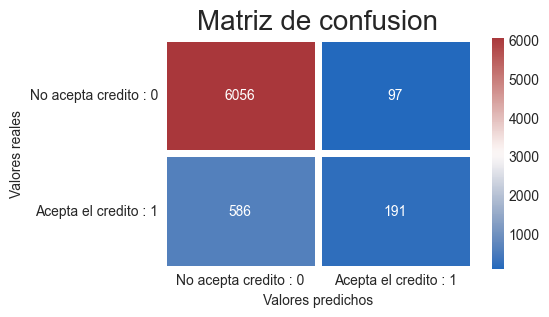

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_reg_log_rand_over

metricas sobre X_train_rand_over y y_train_rand_over

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.70      0.84      0.76     14356
Acepta el credito : 1       0.80      0.63      0.71     14356

             accuracy                           0.74     28712
            macro avg       0.75      0.74      0.74     28712
         weighted avg       0.75      0.74      0.74     28712



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.95      0.84      0.89      6153
Acepta el credito : 1       0.33      0.65      0.44       777

             accuracy                           0.82      6930
            macro 

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  5146                  1007
           Acepta el credito : 1                   275                   502

Grafico de la matriz de confusión


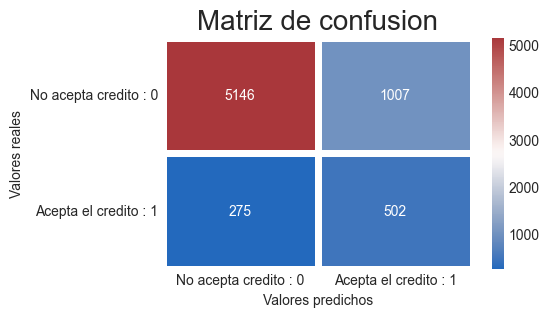

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_reg_log_smote

metricas sobre X_train_smote y y_train_smote

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.71      0.83      0.77     14356
Acepta el credito : 1       0.80      0.66      0.72     14356

             accuracy                           0.75     28712
            macro avg       0.75      0.75      0.74     28712
         weighted avg       0.75      0.75      0.74     28712



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.95      0.82      0.88      6153
Acepta el credito : 1       0.32      0.65      0.43       777

             accuracy                           0.80      6930
            macro avg       0.

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  5052                  1101
           Acepta el credito : 1                   269                   508

Grafico de la matriz de confusión


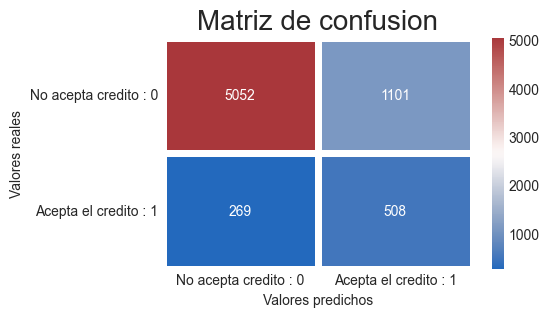

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_reg_log_bor_smote

metricas sobre X_train_bor_smote y y_train_bor_smote

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.75      0.82      0.78     14356
Acepta el credito : 1       0.80      0.73      0.76     14356

             accuracy                           0.77     28712
            macro avg       0.77      0.77      0.77     28712
         weighted avg       0.77      0.77      0.77     28712



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.95      0.81      0.87      6153
Acepta el credito : 1       0.31      0.67      0.42       777

             accuracy                           0.79      6930
            macro 

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  4982                  1171
           Acepta el credito : 1                   257                   520

Grafico de la matriz de confusión


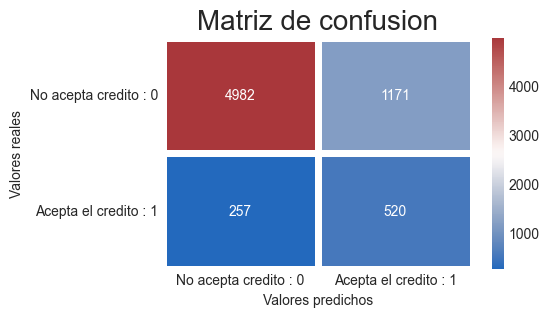

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_reg_log_rand_under

metricas sobre X_train_rand_under y y_train_rand_under

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.70      0.83      0.76      1813
Acepta el credito : 1       0.79      0.64      0.71      1813

             accuracy                           0.74      3626
            macro avg       0.75      0.74      0.73      3626
         weighted avg       0.75      0.74      0.73      3626



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.95      0.83      0.88      6153
Acepta el credito : 1       0.32      0.66      0.43       777

             accuracy                           0.81      6930
            mac

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  5082                  1071
           Acepta el credito : 1                   267                   510

Grafico de la matriz de confusión


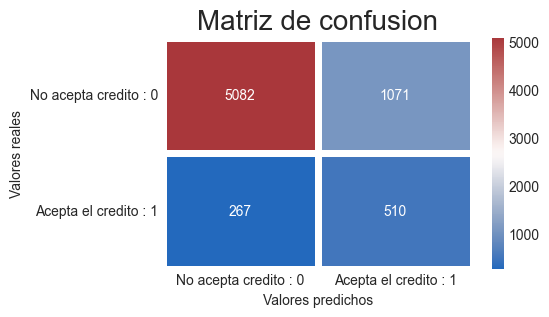

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_reg_log_miss

metricas sobre X_train_miss y y_train_miss

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.76      0.87      0.81      1813
Acepta el credito : 1       0.85      0.72      0.78      1813

             accuracy                           0.80      3626
            macro avg       0.80      0.80      0.80      3626
         weighted avg       0.80      0.80      0.80      3626



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.94      0.55      0.69      6153
Acepta el credito : 1       0.17      0.75      0.28       777

             accuracy                           0.57      6930
            macro avg       0.56 

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  3361                  2792
           Acepta el credito : 1                   196                   581

Grafico de la matriz de confusión


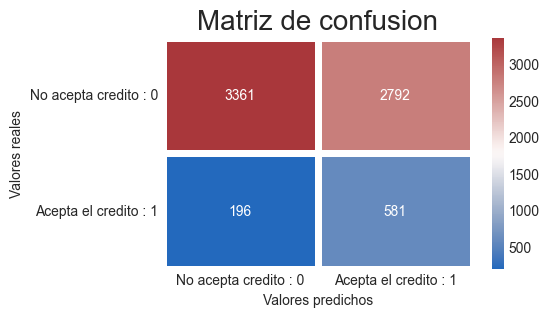

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [833]:
metricas(dict_mejores_models_reg_log)

## 5.1.2 Metricas para mejores modelos de arbol de decisión  
Observemos las metricas para los mejores modelos de arbol de decisión, tanto, para datos de entrenamiento como datos de prueba

Mejor_modelo_decision_tree_Pca

metricas sobre X_train_Pca y y_train_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.95      0.88      0.91     14356
Acepta el credito : 1       0.40      0.63      0.49      1813

             accuracy                           0.85     16169
            macro avg       0.68      0.76      0.70     16169
         weighted avg       0.89      0.85      0.87     16169



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.94      0.86      0.90      6153
Acepta el credito : 1       0.36      0.59      0.45       777

             accuracy                           0.83      6930
            macro avg       0.65      0.73      0.67      6930
         weighted avg       0.88      0.83      0.85      6930

Dataframe de la matriz de confusión


Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  5320                   833
           Acepta el credito : 1                   316                   461

Grafico de la matriz de confusión


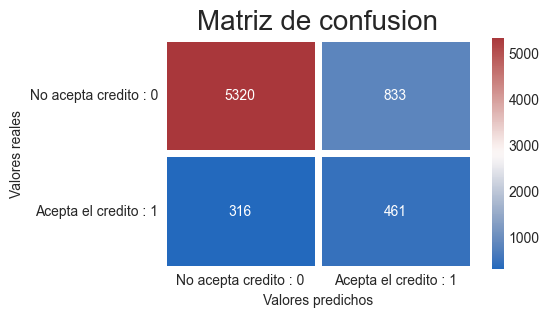

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_decision_tree_rand_over

metricas sobre X_train_rand_over y y_train_rand_over

reporte                        precision    recall  f1-score   support

No acepta credito : 0       1.00      1.00      1.00     14356
Acepta el credito : 1       1.00      1.00      1.00     14356

             accuracy                           1.00     28712
            macro avg       1.00      1.00      1.00     28712
         weighted avg       1.00      1.00      1.00     28712



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.91      0.91      0.91      6153
Acepta el credito : 1       0.31      0.33      0.32       777

             accuracy                           0.84      6930
            

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  5581                   572
           Acepta el credito : 1                   519                   258

Grafico de la matriz de confusión


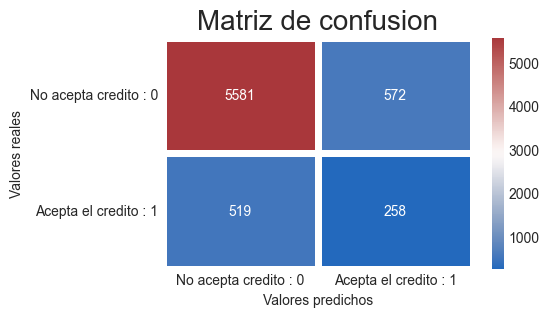

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_decision_tree_smote

metricas sobre X_train_smote y y_train_smote

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.94      0.97      0.95     14356
Acepta el credito : 1       0.97      0.94      0.95     14356

             accuracy                           0.95     28712
            macro avg       0.95      0.95      0.95     28712
         weighted avg       0.95      0.95      0.95     28712



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.92      0.91      0.92      6153
Acepta el credito : 1       0.35      0.37      0.36       777

             accuracy                           0.85      6930
            macro avg   

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  5628                   525
           Acepta el credito : 1                   492                   285

Grafico de la matriz de confusión


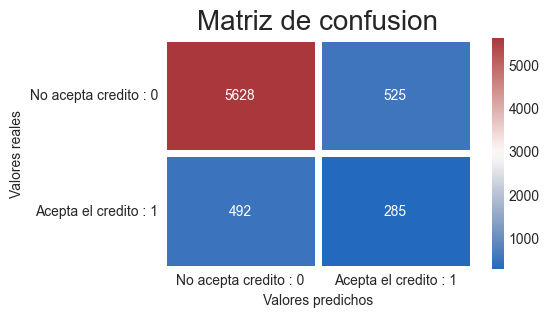

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_decision_tree_bor_smote

metricas sobre X_train_bor_smote y y_train_bor_smote

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.95      0.97      0.96     14356
Acepta el credito : 1       0.97      0.95      0.96     14356

             accuracy                           0.96     28712
            macro avg       0.96      0.96      0.96     28712
         weighted avg       0.96      0.96      0.96     28712



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.92      0.92      0.92      6153
Acepta el credito : 1       0.37      0.35      0.36       777

             accuracy                           0.86      6930
            

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  5687                   466
           Acepta el credito : 1                   502                   275

Grafico de la matriz de confusión


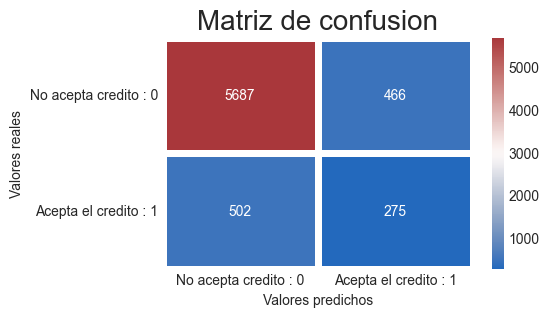

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_decision_tree_rand_under

metricas sobre X_train_rand_under y y_train_rand_under

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.71      0.83      0.76      1813
Acepta el credito : 1       0.79      0.66      0.72      1813

             accuracy                           0.74      3626
            macro avg       0.75      0.74      0.74      3626
         weighted avg       0.75      0.74      0.74      3626



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.95      0.81      0.88      6153
Acepta el credito : 1       0.32      0.69      0.43       777

             accuracy                           0.80      6930
         

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  4999                  1154
           Acepta el credito : 1                   243                   534

Grafico de la matriz de confusión


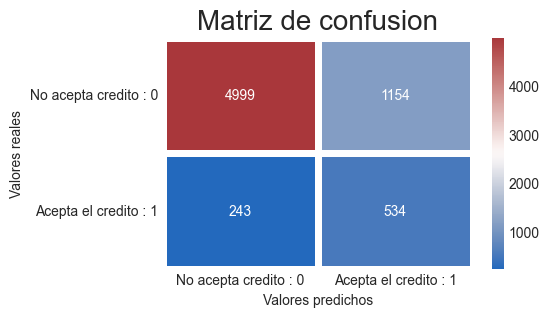

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_decision_tree_miss

metricas sobre X_train_miss y y_train_miss

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.71      0.86      0.78      1813
Acepta el credito : 1       0.83      0.65      0.73      1813

             accuracy                           0.76      3626
            macro avg       0.77      0.76      0.75      3626
         weighted avg       0.77      0.76      0.75      3626



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.95      0.71      0.81      6153
Acepta el credito : 1       0.23      0.70      0.35       777

             accuracy                           0.70      6930
            macro avg      

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  4338                  1815
           Acepta el credito : 1                   231                   546

Grafico de la matriz de confusión


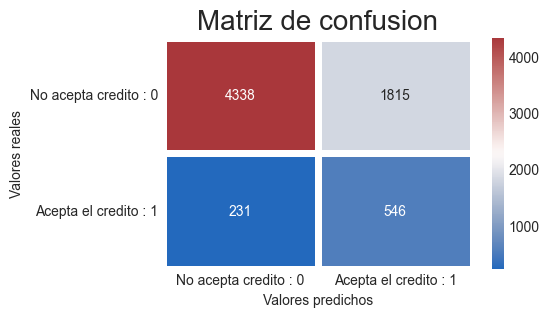

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [801]:
metricas(dict_mejores_models_decision_tree)

## 5.1.3 Metricas para mejores modelos de random forest  
Observemos las metricas para los mejores modelos de ramdon forest , tanto, para datos de entrenamiento como datos de prueba

Mejor_modelo_Random_Forest_Pca

metricas sobre X_train_Pca y y_train_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.93      1.00      0.96     14356
Acepta el credito : 1       0.94      0.44      0.60      1813

             accuracy                           0.93     16169
            macro avg       0.94      0.72      0.78     16169
         weighted avg       0.93      0.93      0.92     16169



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.91      0.98      0.94      6153
Acepta el credito : 1       0.61      0.23      0.33       777

             accuracy                           0.90      6930
            macro avg       0.76      0.60      0.64      6930
         weighted avg       0.88      0.90      0.88      6930

Dataframe de la matriz de confusión


Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  6039                   114
           Acepta el credito : 1                   601                   176

Grafico de la matriz de confusión


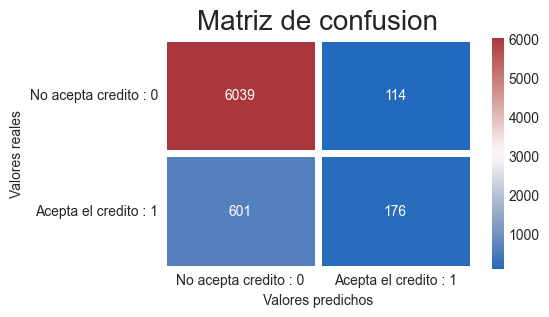

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_Random_Forest_rand_over

metricas sobre X_train_rand_over y y_train_rand_over

reporte                        precision    recall  f1-score   support

No acepta credito : 0       1.00      0.99      1.00     14356
Acepta el credito : 1       0.99      1.00      1.00     14356

             accuracy                           1.00     28712
            macro avg       1.00      1.00      1.00     28712
         weighted avg       1.00      1.00      1.00     28712



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.93      0.93      0.93      6153
Acepta el credito : 1       0.43      0.41      0.42       777

             accuracy                           0.87      6930
            

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  5729                   424
           Acepta el credito : 1                   462                   315

Grafico de la matriz de confusión


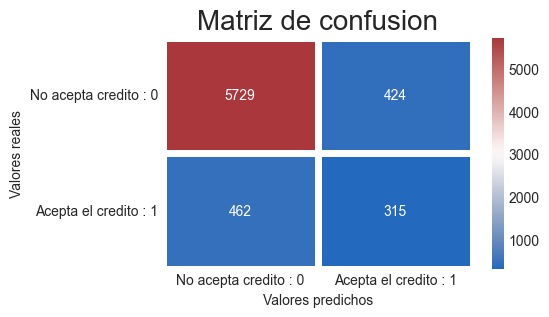

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_Random_Forest_smote

metricas sobre X_train_smote y y_train_smote

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.99      1.00      0.99     14356
Acepta el credito : 1       1.00      0.99      0.99     14356

             accuracy                           0.99     28712
            macro avg       0.99      0.99      0.99     28712
         weighted avg       0.99      0.99      0.99     28712



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.92      0.95      0.94      6153
Acepta el credito : 1       0.48      0.38      0.43       777

             accuracy                           0.89      6930
            macro avg   

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  5836                   317
           Acepta el credito : 1                   479                   298

Grafico de la matriz de confusión


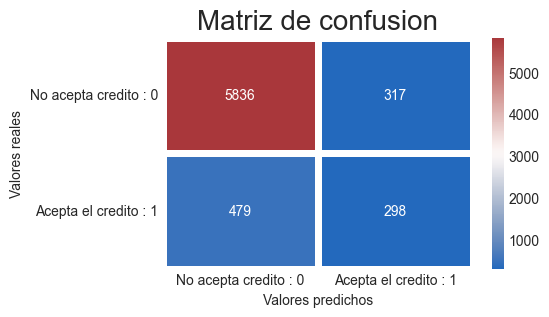

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_Random_Forest_bor_smote

metricas sobre X_train_bor_smote y y_train_bor_smote

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.99      1.00      0.99     14356
Acepta el credito : 1       1.00      0.99      0.99     14356

             accuracy                           0.99     28712
            macro avg       0.99      0.99      0.99     28712
         weighted avg       0.99      0.99      0.99     28712



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.93      0.95      0.94      6153
Acepta el credito : 1       0.49      0.40      0.44       777

             accuracy                           0.89      6930
            

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  5830                   323
           Acepta el credito : 1                   465                   312

Grafico de la matriz de confusión


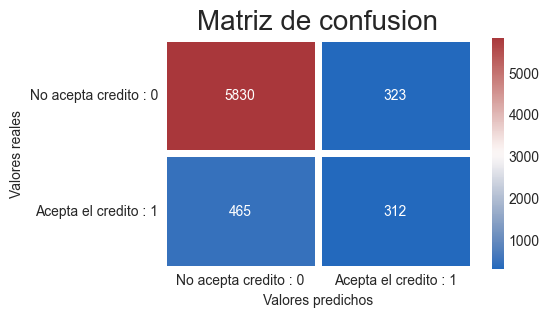

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_Random_Forest_rand_under

metricas sobre X_train_rand_under y y_train_rand_under

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.72      0.88      0.79      1813
Acepta el credito : 1       0.84      0.66      0.74      1813

             accuracy                           0.77      3626
            macro avg       0.78      0.77      0.77      3626
         weighted avg       0.78      0.77      0.77      3626



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.95      0.85      0.90      6153
Acepta el credito : 1       0.35      0.66      0.46       777

             accuracy                           0.83      6930
         

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  5210                   943
           Acepta el credito : 1                   267                   510

Grafico de la matriz de confusión


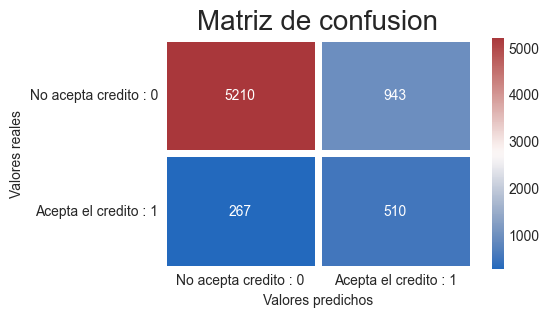

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_Random_Forest_miss

metricas sobre X_train_miss y y_train_miss

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.74      0.91      0.82      1813
Acepta el credito : 1       0.88      0.68      0.77      1813

             accuracy                           0.79      3626
            macro avg       0.81      0.79      0.79      3626
         weighted avg       0.81      0.79      0.79      3626



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.95      0.66      0.77      6153
Acepta el credito : 1       0.20      0.70      0.32       777

             accuracy                           0.66      6930
            macro avg      

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  4035                  2118
           Acepta el credito : 1                   231                   546

Grafico de la matriz de confusión


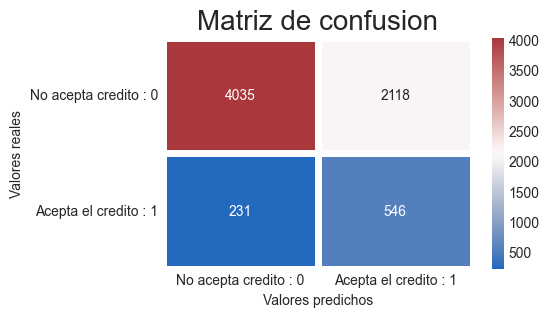

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [802]:
metricas(dict_mejores_models_random_forest)

## 5.1.4 Metricas para mejores maquina de soporte vectorial 
Observemos las metricas para los mejores modelos de maquina de soporte vectorial , tanto, para datos de entrenamiento como datos de prueba

Mejor_modelo_SVM_Pca

metricas sobre X_train_Pca y y_train_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.91      0.99      0.95     14356
Acepta el credito : 1       0.74      0.18      0.29      1813

             accuracy                           0.90     16169
            macro avg       0.82      0.59      0.62     16169
         weighted avg       0.89      0.90      0.87     16169



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.91      0.99      0.95      6153
Acepta el credito : 1       0.73      0.18      0.29       777

             accuracy                           0.90      6930
            macro avg       0.82      0.59      0.62      6930
         weighted avg       0.89      0.90      0.87      6930

Dataframe de la matriz de confusión


Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  6100                    53
           Acepta el credito : 1                   635                   142

Grafico de la matriz de confusión


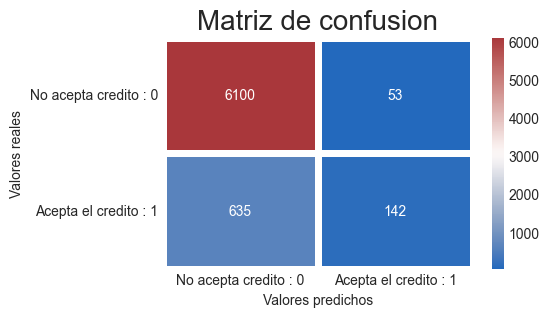

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_SVM_rand_over

metricas sobre X_train_rand_over y y_train_rand_over

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.78      0.87      0.82     14356
Acepta el credito : 1       0.86      0.75      0.80     14356

             accuracy                           0.81     28712
            macro avg       0.82      0.81      0.81     28712
         weighted avg       0.82      0.81      0.81     28712



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.94      0.85      0.89      6153
Acepta el credito : 1       0.33      0.60      0.43       777

             accuracy                           0.82      6930
            macro avg 

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  5213                   940
           Acepta el credito : 1                   308                   469

Grafico de la matriz de confusión


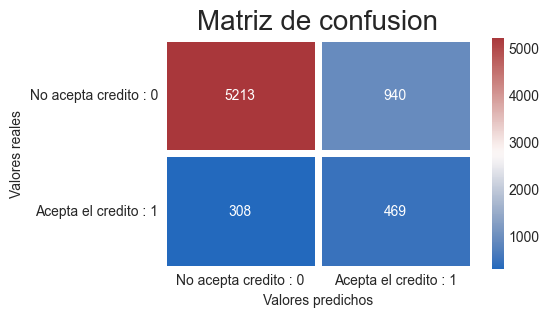

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_SVM_smote

metricas sobre X_train_smote y y_train_smote

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.87      0.95      0.91     14356
Acepta el credito : 1       0.94      0.86      0.90     14356

             accuracy                           0.90     28712
            macro avg       0.91      0.90      0.90     28712
         weighted avg       0.91      0.90      0.90     28712



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.93      0.93      0.93      6153
Acepta el credito : 1       0.44      0.46      0.45       777

             accuracy                           0.88      6930
            macro avg       0.69  

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  5710                   443
           Acepta el credito : 1                   422                   355

Grafico de la matriz de confusión


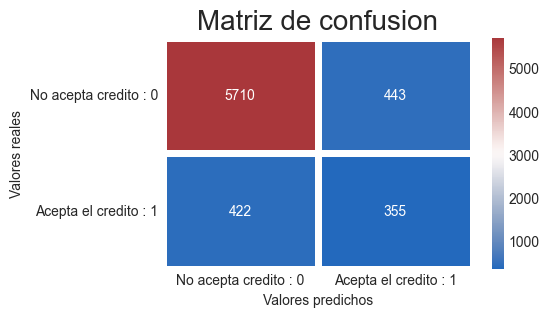

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_SVM_bor_smote

metricas sobre X_train_bor_smote y y_train_bor_smote

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.89      0.93      0.91     14356
Acepta el credito : 1       0.93      0.89      0.91     14356

             accuracy                           0.91     28712
            macro avg       0.91      0.91      0.91     28712
         weighted avg       0.91      0.91      0.91     28712



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.93      0.92      0.93      6153
Acepta el credito : 1       0.43      0.49      0.46       777

             accuracy                           0.87      6930
            macro avg 

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  5648                   505
           Acepta el credito : 1                   394                   383

Grafico de la matriz de confusión


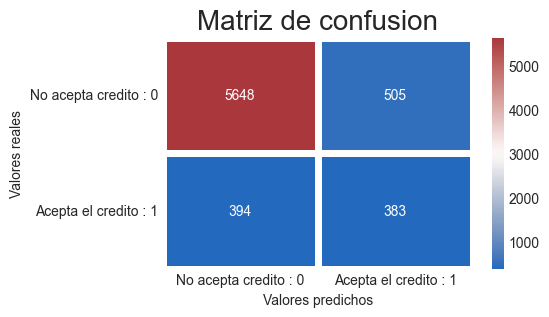

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_SVM_rand_under

metricas sobre X_train_rand_under y y_train_rand_under

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.71      0.86      0.78      1813
Acepta el credito : 1       0.83      0.65      0.73      1813

             accuracy                           0.76      3626
            macro avg       0.77      0.76      0.75      3626
         weighted avg       0.77      0.76      0.75      3626



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.95      0.83      0.89      6153
Acepta el credito : 1       0.33      0.66      0.44       777

             accuracy                           0.81      6930
            macro a

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  5121                  1032
           Acepta el credito : 1                   267                   510

Grafico de la matriz de confusión


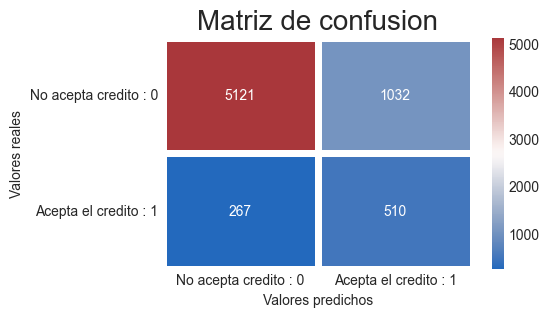

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_SVM_miss

metricas sobre X_train_miss y y_train_miss

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.73      0.90      0.80      1813
Acepta el credito : 1       0.87      0.66      0.75      1813

             accuracy                           0.78      3626
            macro avg       0.80      0.78      0.78      3626
         weighted avg       0.80      0.78      0.78      3626



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.94      0.61      0.74      6153
Acepta el credito : 1       0.18      0.68      0.29       777

             accuracy                           0.62      6930
            macro avg       0.56     

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  3745                  2408
           Acepta el credito : 1                   245                   532

Grafico de la matriz de confusión


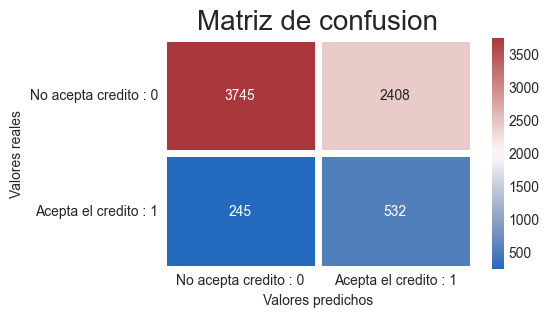

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [803]:
metricas(dict_mejores_models_SVM)

## 5.1.5 Metricas para mejores redes neuronales
Observemos las metricas para los mejores modelos de red vectorial , tanto, para datos de entrenamiento como datos de prueba

Mejor_modelo_redes_neuronales_Pca

metricas sobre X_train_Pca y y_train_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.91      0.98      0.95     14356
Acepta el credito : 1       0.65      0.23      0.33      1813

             accuracy                           0.90     16169
            macro avg       0.78      0.60      0.64     16169
         weighted avg       0.88      0.90      0.88     16169



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.91      0.98      0.95      6153
Acepta el credito : 1       0.66      0.25      0.36       777

             accuracy                           0.90      6930
            macro avg       0.79      0.61      0.65      6930
         weighted avg       0.88      0.90      0.88      6930

Dataframe de la matriz de confusión


Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  6055                    98
           Acepta el credito : 1                   586                   191

Grafico de la matriz de confusión


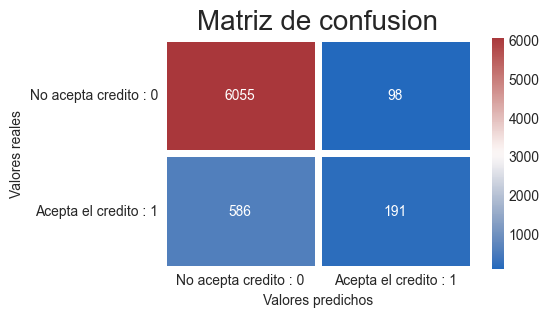

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_redes_neuronales_rand_over

metricas sobre X_train_rand_over y y_train_rand_over

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.99      0.94      0.96     14356
Acepta el credito : 1       0.94      0.99      0.96     14356

             accuracy                           0.96     28712
            macro avg       0.97      0.96      0.96     28712
         weighted avg       0.97      0.96      0.96     28712



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.91      0.86      0.89      6153
Acepta el credito : 1       0.25      0.37      0.30       777

             accuracy                           0.80      6930
         

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  5284                   869
           Acepta el credito : 1                   491                   286

Grafico de la matriz de confusión


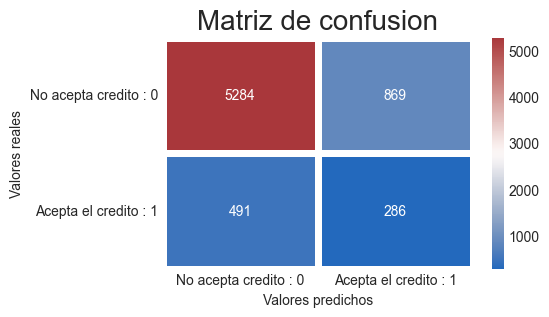

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_redes_neuronales_smote

metricas sobre X_train_smote y y_train_smote

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.98      0.98      0.98     14356
Acepta el credito : 1       0.98      0.98      0.98     14356

             accuracy                           0.98     28712
            macro avg       0.98      0.98      0.98     28712
         weighted avg       0.98      0.98      0.98     28712



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.91      0.91      0.91      6153
Acepta el credito : 1       0.31      0.33      0.32       777

             accuracy                           0.84      6930
            macro avg

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  5575                   578
           Acepta el credito : 1                   518                   259

Grafico de la matriz de confusión


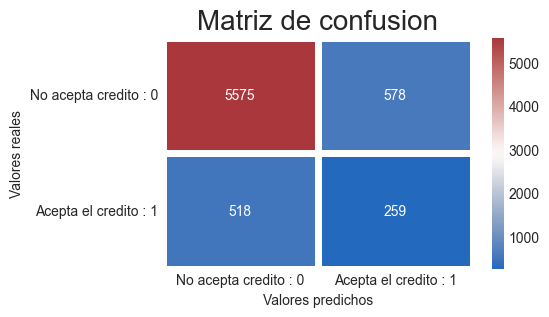

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_redes_neuronales_bor_smote

metricas sobre X_train_bor_smote y y_train_bor_smote

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.98      0.98      0.98     14356
Acepta el credito : 1       0.98      0.98      0.98     14356

             accuracy                           0.98     28712
            macro avg       0.98      0.98      0.98     28712
         weighted avg       0.98      0.98      0.98     28712



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.91      0.90      0.91      6153
Acepta el credito : 1       0.30      0.33      0.32       777

             accuracy                           0.84      6930
         

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  5557                   596
           Acepta el credito : 1                   518                   259

Grafico de la matriz de confusión


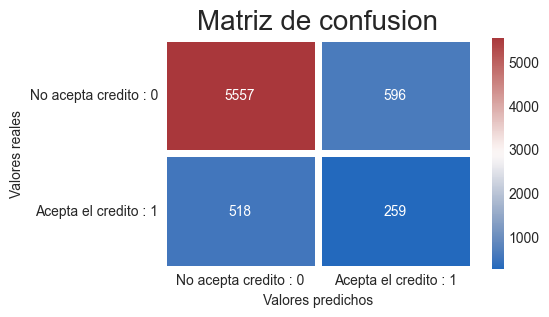

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_redes_neuronales_rand_under

metricas sobre X_train_rand_under y y_train_rand_under

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.70      0.84      0.76      1813
Acepta el credito : 1       0.80      0.64      0.71      1813

             accuracy                           0.74      3626
            macro avg       0.75      0.74      0.74      3626
         weighted avg       0.75      0.74      0.74      3626



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.95      0.83      0.88      6153
Acepta el credito : 1       0.33      0.66      0.43       777

             accuracy                           0.81      6930
      

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  5094                  1059
           Acepta el credito : 1                   267                   510

Grafico de la matriz de confusión


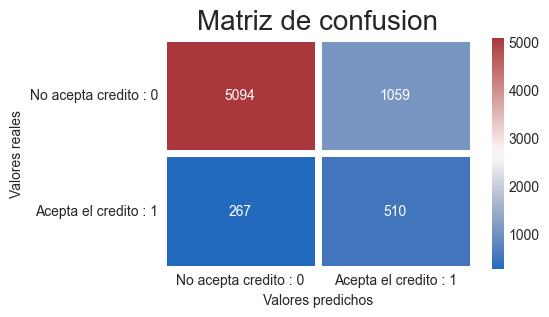

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mejor_modelo_redes_neuronales_miss

metricas sobre X_train_miss y y_train_miss

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.76      0.87      0.81      1813
Acepta el credito : 1       0.85      0.72      0.78      1813

             accuracy                           0.80      3626
            macro avg       0.80      0.80      0.80      3626
         weighted avg       0.80      0.80      0.80      3626



metricas sobre X_test_Pca y y_test_Pca

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.94      0.55      0.69      6153
Acepta el credito : 1       0.17      0.75      0.28       777

             accuracy                           0.57      6930
            macro avg   

Valor predicho                      
                                 No acepta credito : 0 Acepta el credito : 1
Valor real No acepta credito : 0                  3356                  2797
           Acepta el credito : 1                   196                   581

Grafico de la matriz de confusión


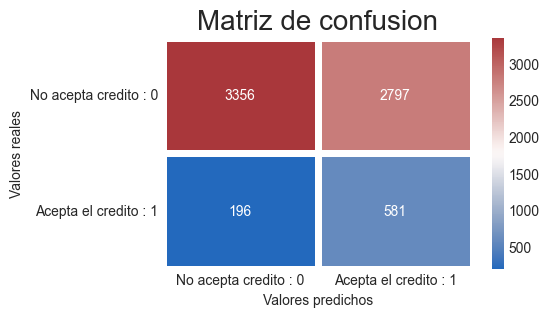

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [804]:
metricas(dict_mejores_neuronal)

## 5.2 Mejor modelo de cada tipo de clasificador 
Aca escojemos los mejores modelos de cada tipo de clasificador, teniendo en cuenta su desempeño que se presenta en la subsecion anterior y tambien presentamos sus metricas 







In [817]:
def metricasfinal(mejor_modelo):
   
        lista_clase=["No acepta credito : 0", "Acepta el credito : 1"]
        y_pred=mejor_modelo.predict(X_test_Pca)
        print("reporte", classification_report(y_test_Pca, y_pred,target_names=lista_clase))
        mc=confusion_matrix(y_test_Pca, y_pred)
        dtf=list_confusion_matrix(mc,lista_clase)
        print("Dataframe de la matriz de confusión")
        dtf.columns = dtf.columns.droplevel(0)
        dtf.index = dtf.index.droplevel(0)
        print("Grafico de la matriz de confusión")
        plt.subplots(figsize=(4.5,2.5))  
        sns.heatmap(dtf, cmap = "vlag",annot = True,fmt=".0f",linewidths = 5)
        plt.ylabel("Valores reales")
        plt.xlabel("Valores predichos")
        plt.title("Matriz de confusion", fontsize=20)
        plt.show()

### 5.2.1 Mejor modelo regresion logistica
El mejor modelo para regresion logistica fue **Mejor_modelo_reg_log_rand_over**, el conjunto de datos para entrenamiento de este modelo fue balanceado con la tecnica de Random Oversampling.

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.95      0.84      0.89      6153
Acepta el credito : 1       0.33      0.65      0.44       777

             accuracy                           0.82      6930
            macro avg       0.64      0.74      0.66      6930
         weighted avg       0.88      0.82      0.84      6930

Dataframe de la matriz de confusión
Grafico de la matriz de confusión


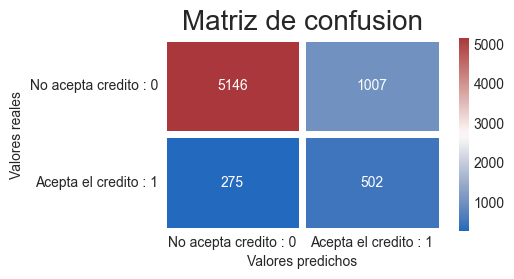

In [818]:
mejor_modelo_reg_log=dict_mejores_models_reg_log["Mejor_modelo_reg_log_rand_over"]
metricasfinal(mejor_modelo_reg_log)

### 5.2.2 Mejor modelo de arbol de decisión 
El mejor modelo para el clasificador de arbol de decisón fue **Mejor_modelo_decision_tree_Pca**,
el cual, se entreno con los datos que solo pasaron por la transformación PCA, pero en el modelo se escogio class weight=balanced que es un balanceado por pesos.

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.94      0.86      0.90      6153
Acepta el credito : 1       0.36      0.59      0.45       777

             accuracy                           0.83      6930
            macro avg       0.65      0.73      0.67      6930
         weighted avg       0.88      0.83      0.85      6930

Dataframe de la matriz de confusión
Grafico de la matriz de confusión


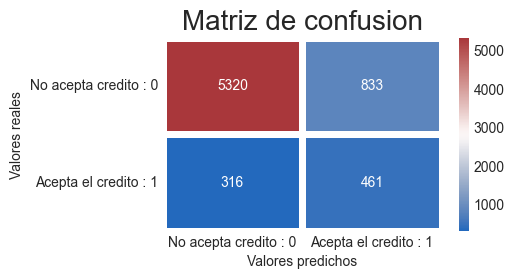

In [821]:
mejor_modelo_decision_tree=dict_mejores_models_decision_tree["Mejor_modelo_decision_tree_Pca"]
metricasfinal(mejor_modelo_decision_tree)

### 5.2.3 Mejor modelo random forest 
El mejor modelo para el clasificador random forest fue **Mejor_modelo_Random_Forest_rand_under** que fue entrenado con los datos bajo RandomUnderSampler, donde se iguala la clase mayoria a la calse minoritaria de manera aleatoria. 




reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.95      0.85      0.90      6153
Acepta el credito : 1       0.35      0.66      0.46       777

             accuracy                           0.83      6930
            macro avg       0.65      0.75      0.68      6930
         weighted avg       0.88      0.83      0.85      6930

Dataframe de la matriz de confusión
Grafico de la matriz de confusión


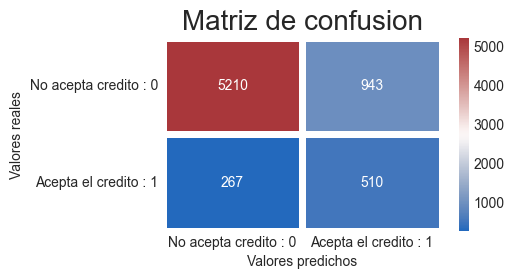

In [824]:
mejor_modelo_random_forest=dict_mejores_models_random_forest['Mejor_modelo_Random_Forest_rand_under']
metricasfinal(mejor_modelo_random_forest)

### 5.2.4 Mejor modelo de maquina de soporte vectorial 
El mejor modelo para el clasificador con maquina de soporte vectorial **Mejor_modelo_SVM_rand_over**  el conjunto de datos para entrenamiento de este modelo fue balanceado con la tecnica de Random Oversampling, por otro atro, el modelo **Mejor_modelo_SVM_rand_under** tambien es bastante bueno.

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.94      0.85      0.89      6153
Acepta el credito : 1       0.33      0.60      0.43       777

             accuracy                           0.82      6930
            macro avg       0.64      0.73      0.66      6930
         weighted avg       0.88      0.82      0.84      6930

Dataframe de la matriz de confusión
Grafico de la matriz de confusión


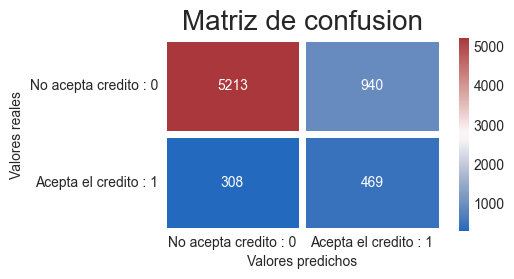

In [826]:
mejor_modelo_SVM=dict_mejores_models_SVM['Mejor_modelo_SVM_rand_over']
metricasfinal(mejor_modelo_SVM)

### 5.2.5 Mejor modelo de redes neuronales 
El mejor modelo para el clasificador MLPC red neuronal fue **Mejor_modelo_redes_neuronales_rand_under** under que fue entrenado con los datos bajo RandomUnderSampler, donde se iguala la clase mayoria a la calse minoritaria de manera aleatoria. 

reporte                        precision    recall  f1-score   support

No acepta credito : 0       0.95      0.83      0.88      6153
Acepta el credito : 1       0.33      0.66      0.43       777

             accuracy                           0.81      6930
            macro avg       0.64      0.74      0.66      6930
         weighted avg       0.88      0.81      0.83      6930

Dataframe de la matriz de confusión
Grafico de la matriz de confusión


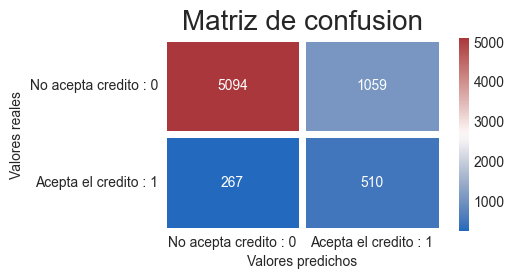

In [830]:
mejor_modelo_red_neuronal=dict_mejores_neuronal["Mejor_modelo_redes_neuronales_rand_under"] 
metricasfinal(mejor_modelo_red_neuronal)

## 5.3 Analisis de los resultados
En está ultima subsección de analizaran los resultados de los clasificadores especialmente sobre la clase acepta el credito ,ya que, objetivo del negocio es aumentar la cantidad de suscriptores clientes a nuevos creditos. Con este fin en mente creemos un data frame para visulizar las metricas de los mejores clasificadores a dicha clase.


In [841]:
datos=[[0.33,0.65,0.44,777,502,1007],[0.36,0.59,0.45,777,461,833],[0.35,0.66,0.46,777,510,943]
      ,[0.33,0.60,0.43,777,469,940],[0.33,0.66,0.43,777,510,1059]]

index=["Regresion_Logistica","Decision_Tree","Random_Forets","Maquina_Soporte_SVM","Red_Neuronal"]
columns=["precision","recall","f1-score","Muestra_Reales","Muestras_predichas",
         "Falsos Negativos" ]

df_final=pd.DataFrame(datos,index,columns)
df_final

precision  recall  f1-score  Muestra_Reales  \
Regresion_Logistica       0.33    0.65      0.44             777   
Decision_Tree             0.36    0.59      0.45             777   
Random_Forets             0.35    0.66      0.46             777   
Maquina_Soporte_SVM       0.33    0.60      0.43             777   
Red_Neuronal              0.33    0.66      0.43             777   

                     Muestras_predichas  Falsos Negativos  
Regresion_Logistica                 502              1007  
Decision_Tree                       461               833  
Random_Forets                       510               943  
Maquina_Soporte_SVM                 469               940  
Red_Neuronal                        510              1059

Observando el dataframe anterior vemos que en general todos los mejores clasificadores de cada tipo muestran metricas muy parecidas. Vamos a crear una nueva columna que es la probabilidad para cada modelo de sacar una muestra predicha real definida como:
$$Pbr(1:Mreal)=Muestraspredichas/(Muestraspredichas+FalsosNegativos)$$
Creemos la nueva columna:

In [844]:
df_final["P(1:Mreal)"]=df_final["Muestras_predichas"]/(df_final["Muestras_predichas"]
                                                       +df_final["Falsos Negativos"])
df_final

precision  recall  f1-score  Muestra_Reales  \
Regresion_Logistica       0.33    0.65      0.44             777   
Decision_Tree             0.36    0.59      0.45             777   
Random_Forets             0.35    0.66      0.46             777   
Maquina_Soporte_SVM       0.33    0.60      0.43             777   
Red_Neuronal              0.33    0.66      0.43             777   

                     Muestras_predichas  Falsos Negativos  P(1:Mreal)  
Regresion_Logistica                 502              1007    0.332671  
Decision_Tree                       461               833    0.356260  
Random_Forets                       510               943    0.350998  
Maquina_Soporte_SVM                 469               940    0.332860  
Red_Neuronal                        510              1059    0.325048

Vemos que la probabilidad al tomar una muestra predicha en la clase negativa sea realmente negativa y no un falso negativo bastante similar en todos los modelos.  

Por tanto, ya teniendo estos valores se puede concluir que al utilizar cualquier clasificador sobre los datos del negocio si un cliente es clasiificado como mienbro de clase negativa se obtiene una probabilidad entre (0.32,0.35) de que el cliente acepte el credito, lo cual, es muy importante para el negocio, basicamente 1 de 3 clientes clasificasos en la clase "si acepta el credito(clase negativa)" aceptara el credito. Por tanto, si antes se tenia que  1 de 10 clientes tomaba el credito con los modelos se ha bajado a 1 de 3, lo que, mejora notablemente la tasa de efectividad de suscriptores a creditos.
Con lo anterior en mente se puedes diseñar estrategias de marketing enfocada solo a los clientes  nuevos y antiguos que sean clasificados por medio del clasificador en la clase negatica "si acepta el credito" para aumentar aun mas el exito.

Una estrategia importante que se puede aplicar para diseñar las campañas tambien esta relacionada con atacar las caracteristicas mas importantes de los medelos de Decision tree y Random forest







Por ultimo, cabe mencionar que algunos de los mejores modelos de la seccion  4.4 presentan sobreajuste, algunos de estos son:
* **Mejor_modelo_decision_tree_rand_over**
* **Mejor_modelo_Random_Forest_rand_over**
* **Mejor_modelo_Random_Forest_smot**
* **Mejor_modelo_Random_Forest_bor_smote**
* **Mejor_modelo_redes_neuronales_smote**
* **Mejor_modelo_redes_neuronales_bor_smote**
Esto se observa claramente ya que las metricas en los datos de entrenamiento son 1 o cercanas a 1, mientras que, que en los datos de prueba son bajas, para dar un ejemplo

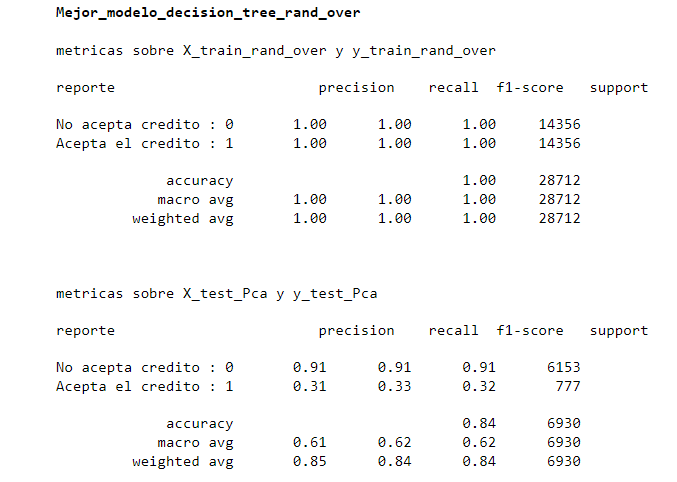

Se ve como sobre los datos de entrenamiento las metricas son 1 para cada clase, sin embargo, para los datos de prueba  las metricas para las clase negativa o 1 son muy bajas, lo revela, la memorización del clasificador que sobre los datos de entrenamiento conocido como sobreajuste.